# Perceptron

![](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp)

### Spróbujmy za pomocą perceptronów uzyskać $\hat f$ z tw. Cybenki



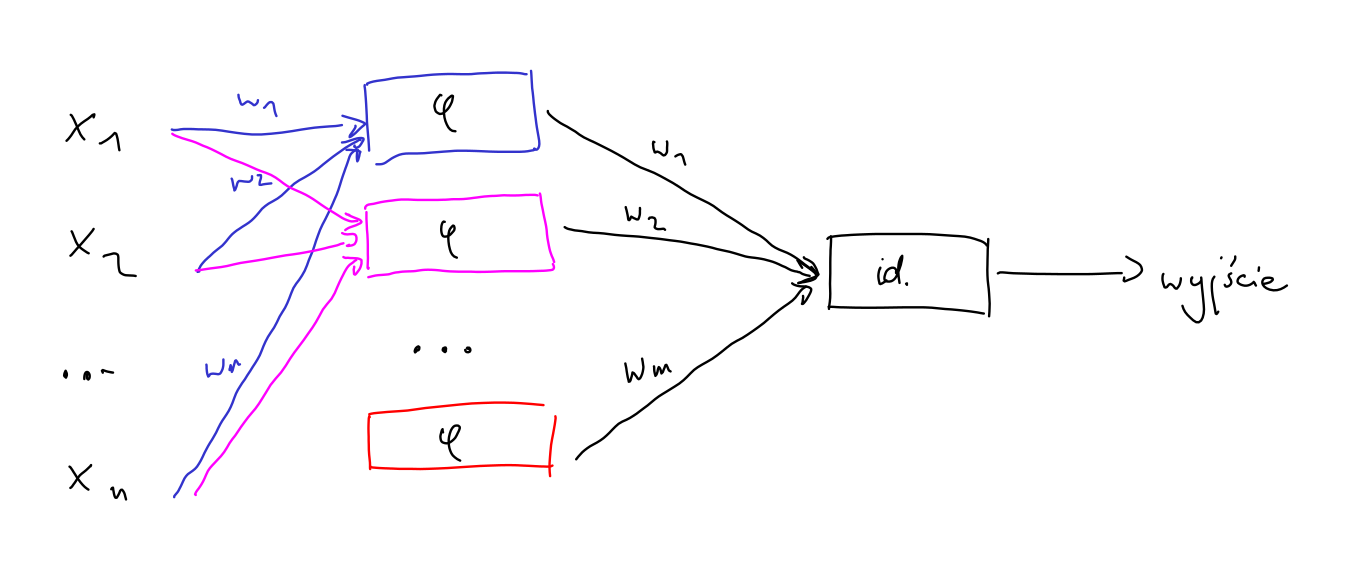

## Uwagi
- W większości przypadków zadziała więcej warstw perceptronów, a nawet pozwoli to użycie ich mniejszej liczby.
- W pewnych szczególnych przypadkach można użyć tylko jednego perceptronu.

# Praktyka


In [2]:
# Numpy służy nam tylko do obliczeń
import numpy as np

In [3]:
class Perceptron():
  def __init__(self, size, init_weights, activation, bias=0):
    self.size = size
    self.bias = bias
    self.activation = activation
    if init_weights:
      self.weights = np.random.rand(size)
    else:
      self.weights = np.zeros(size)

  def calc(self, input):
    assert len(input)==self.size
    sum = np.dot(input, self.weights) + self.bias
    return self.activation(sum)

  def learn(self, input, true_value, loss, lr):
    prediction = self.calc(input)
    self.bias += lr * loss(true_value, prediction)
    self.weights += np.array([input[i] * lr * loss(true_value, prediction) for i in range(self.size)])

  def learn_gradient(self, input, true_value, loss, lr):
    prediction = self.calc(input)
    self.weights -= np.array([lr * loss.df(true_value, prediction) * self.activation.df(prediction) * input[i] for i in range(self.size)])
    self.bias -= lr * loss.df(true_value, prediction) * self.activation.df(prediction)

In [4]:
class Activation():
  def __call__(self, x):
    return self.f(x)

class Sigmoid(Activation):
  def f(self, x):
    return 1/(1+np.exp(-x))
  def df(self, x):
    return np.exp(-x)/(np.exp(-x)+1)**2

class Step(Activation):
  def __init__(self, threshold=0.6): self.threshold = threshold
  def f(self, x):
    return 1 if x > self.threshold else 0

class Step2(Activation):
  def __init__(self, threshold=0.6): self.threshold = threshold
  def f(self, x):
    return 1 if x > self.threshold else -1

In [5]:
class Loss():
  def __call__(self, *args):
    return self.f(*args)

class Basic(Loss):
  def f(self, y1, y2):
    return y1 - y2

class Quadratic(Loss):
  def f(self, y1, y2):
    return 0.5*(y1-y2)**2
  def df(self, y1, y2):
    return y2 - y1

### Zadanie:
Skorzystaj z powyższych funkcji żeby skonstruować model i nauczyć go na poniższych danych:
```
[5.1,3.5,1.4,0.2], 0
[4.9,3.0,1.4,0.2], 0 
[4.7,3.2,1.3,0.2], 0 
[4.6,3.1,1.5,0.2], 0 
[5.0,3.6,1.4,0.2], 0 
[5.4,3.9,1.7,0.4], 0 
[4.6,3.4,1.4,0.3], 0 
[7.0,3.2,4.7,1.4], 1 
[6.4,3.2,4.5,1.5], 1 
[6.9,3.1,4.9,1.5], 1 
[5.5,2.3,4.0,1.3], 1 
[6.5,2.8,4.6,1.5], 1  
[5.7,2.8,4.5,1.3], 1 
[6.3,3.3,4.7,1.6], 1 
```
I sprawdź na danych:
```
[5.8,2.6,4.0,1.2] 
[5.1,3.8,1.6,0.2] 
[6.2,2.9,4.3,1.3]
[5.7,2.9,4.2,1.3]
[4.6,3.2,1.4,0.2]
[5.3,3.7,1.5,0.2]
[5.5,2.6,4.4,1.2]
[5.0,3.3,1.4,0.2]
```
Odpowiedzi wyślij na **warsztaty@deepsat.pl**.

Na zwycięzcę czeka nagroda.

In [6]:
# Solv
p = Perceptron(4, False, Sigmoid())
data ='''[5.1,3.5,1.4,0.2], 0
[4.9,3.0,1.4,0.2], 0 
[4.7,3.2,1.3,0.2], 0 
[4.6,3.1,1.5,0.2], 0 
[5.0,3.6,1.4,0.2], 0 
[5.4,3.9,1.7,0.4], 0 
[4.6,3.4,1.4,0.3], 0 
[7.0,3.2,4.7,1.4], 1 
[6.4,3.2,4.5,1.5], 1 
[6.9,3.1,4.9,1.5], 1 
[5.5,2.3,4.0,1.3], 1 
[6.5,2.8,4.6,1.5], 1  
[5.7,2.8,4.5,1.3], 1 
[6.3,3.3,4.7,1.6], 1'''
data = [eval(x) for x in data.split('\n')]
test = '''[5.8,2.6,4.0,1.2] 
[5.1,3.8,1.6,0.2] 
[6.2,2.9,4.3,1.3]
[5.7,2.9,4.2,1.3]
[4.6,3.2,1.4,0.2]
[5.3,3.7,1.5,0.2]
[5.5,2.6,4.4,1.2]
[5.0,3.3,1.4,0.2]'''
test = [eval(x) for x in test.split('\n')]

for i in range(100):
  for input, true_value in data:
    p.learn_gradient(input, true_value, Quadratic(), 1)

for input in test:
  res = p.calc(input)
  print(0 if res < 0.5 else 1, res)

1 0.9957894729930802
0 0.0008450972771490116
1 0.9967063962597354
1 0.9966174519008327
0 0.0024095480913147926
0 0.0006573818740037037
1 0.9991724774045384
0 0.0014571339520070175


### Co to w ogóle są za dane?

https://archive.ics.uci.edu/ml/datasets/iris

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)



#### Dane wejściowe:
1. długość działki kielicha [cm]
2. szerokość działki kielicha [cm]
3. długość płatka [cm]
4. szerokość płatka [cm]



#### Działka kielicha



![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/451px-Petal-sepal.jpg?download)


#### Dane wyjściowe:
- class:
  - Iris Setosa
  - Iris Versicolour / Iris Virginica

# MLP - Multi Layer Perceptron

![](https://austingwalters.com/wp-content/uploads/2018/12/mlp.png)

In [7]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


X=[[1,2], [4,5], [7,8], [5,3], [9,7], [7,5]]
y=[1,1,1,0,0,0]

mlp = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=1)

mlp.fit(X,y)

V=[[9,10], [11,9], [11,12]]

print(mlp.predict(V))

[1 0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Optimizer
- Gradient 
- Adam
  - ma oddzielne LR do każdego atrybutu
  - korzysta z sma do tego
![](https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/EMA_602x345.png)

### Dane
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 \\
X = [fixed acidity, volatile acidity, residual sugar, chlorides, density, sulphates] \\

Szukamy: \\
quality (pomiędzy 0, a 10)

In [8]:
X_1 = [[11.0, 0.3, 2.1, 0.054000000000000006, 0.998, 0.88], [8.4, 0.745, 1.9, 0.09, 0.9965, 0.82], [7.8, 0.5, 1.8, 0.17800000000000002, 0.996, 0.87], [7.7, 0.61, 2.4, 0.083, 0.9963, 0.6], [9.5, 0.55, 2.3, 0.387, 0.9982, 0.67], [8.2, 0.78, 2.2, 0.08900000000000001, 0.9978, 0.46], [9.5, 0.57, 2.3, 0.08199999999999999, 0.99782, 0.55], [13.2, 0.38, 2.7, 0.081, 1.0006, 0.54], [10.0, 0.35, 2.0, 0.061, 0.99585, 0.52], [9.0, 0.44, 2.4, 0.078, 0.9978, 0.58], [6.7, 0.58, 1.8, 0.09699999999999999, 0.9959, 0.54], [12.9, 0.5, 2.8, 0.07200000000000001, 1.0001200000000001, 0.68], [7.6, 0.52, 3.0, 0.067, 0.9971, 0.57], [11.0, 0.2, 2.0, 0.34299999999999997, 0.9979, 0.71], [11.3, 0.37, 2.3, 0.08800000000000001, 0.9988, 0.8], [7.0, 0.6, 2.2, 0.083, 0.9966, 0.62], [6.1, 0.38, 1.8, 0.07200000000000001, 0.9955, 0.57], [10.3, 0.59, 2.8, 0.09, 0.9990000000000001, 0.7], [9.2, 0.67, 3.0, 0.091, 0.9988799999999999, 0.54], [9.5, 0.46, 2.7, 0.092, 0.998, 0.74], [10.4, 0.28, 2.7, 0.105, 0.9988, 0.63], [8.7, 0.7, 2.5, 0.226, 0.9991, 0.6], [8.1, 0.87, 2.2, 0.084, 0.99656, 0.5], [5.6, 0.915, 2.1, 0.040999999999999995, 0.99346, 0.73], [6.1, 0.32, 2.3, 0.071, 0.9963299999999999, 0.97], [7.1, 0.68, 2.2, 0.073, 0.9969, 0.5], [7.2, 0.52, 1.4, 0.07400000000000001, 0.9973, 0.81], [12.5, 0.6, 4.3, 0.1, 1.001, 0.74], [7.7, 0.28, 2.0, 0.062, 0.9952, 0.9], [7.8, 0.59, 2.0, 0.07400000000000001, 0.9968, 0.54], [9.1, 0.76, 1.7, 0.414, 0.9965200000000001, 1.33], [10.8, 0.4, 2.2, 0.084, 0.9984, 0.67], [9.0, 0.43, 2.5, 0.08, 0.9987, 0.62], [6.8, 0.775, 3.0, 0.102, 0.9965, 0.56], [12.2, 0.45, 1.4, 0.075, 0.9969, 0.63], [8.5, 0.34, 1.7, 0.079, 0.99605, 0.63], [7.1, 0.43, 5.5, 0.07, 0.9973, 0.72], [6.8, 0.77, 1.8, 0.066, 0.9976, 0.68], [5.9, 0.395, 2.4, 0.055999999999999994, 0.9936200000000001, 0.67], [10.4, 0.24, 1.8, 0.075, 0.9977, 1.06], [7.4, 0.55, 1.8, 0.08199999999999999, 0.99655, 0.68], [7.9, 0.33, 1.5, 0.055999999999999994, 0.9939600000000001, 0.71], [6.9, 0.49, 1.7, 0.079, 0.9954700000000001, 0.64], [9.3, 0.48, 2.1, 0.127, 0.9968, 0.72], [7.7, 0.6, 2.6, 0.055, 0.99639, 0.56], [7.0, 0.805, 2.5, 0.068, 0.9969, 0.56], [5.6, 0.85, 1.4, 0.045, 0.9924, 0.82], [8.8, 0.47, 2.9, 0.085, 0.9982, 0.6], [8.7, 0.78, 1.7, 0.415, 0.99623, 1.17], [8.4, 0.56, 2.0, 0.08199999999999999, 0.9976, 0.44], [9.7, 0.66, 2.6, 0.094, 0.9979600000000001, 0.66], [13.3, 0.43, 1.9, 0.07, 1.0004, 0.49], [7.3, 0.34, 2.5, 0.064, 0.9952, 0.77], [8.9, 0.48, 2.85, 0.094, 0.9982, 0.53], [9.8, 0.34, 1.4, 0.066, 0.9947, 0.55], [10.2, 0.33, 1.9, 0.081, 0.9962799999999999, 0.48], [10.7, 0.9, 6.6, 0.11199999999999999, 1.00289, 0.68], [7.0, 0.57, 2.0, 0.07200000000000001, 0.99575, 0.61], [7.7, 0.965, 2.1, 0.11199999999999999, 0.9963, 0.5], [13.3, 0.34, 3.2, 0.094, 1.0014, 0.81], [8.0, 0.77, 2.1, 0.079, 0.99656, 0.5], [6.4, 0.885, 2.3, 0.166, 0.99551, 0.51], [9.3, 0.39, 2.1, 0.107, 0.9978, 1.22], [8.8, 0.61, 2.8, 0.08800000000000001, 0.9976, 0.51], [5.6, 0.5, 2.3, 0.049, 0.9937, 0.63], [10.2, 0.4, 2.5, 0.068, 0.99754, 0.86], [11.2, 0.4, 2.0, 0.099, 0.9978299999999999, 0.58], [9.2, 0.53, 2.6, 0.078, 0.9978799999999999, 0.57], [6.6, 0.44, 2.2, 0.063, 0.99444, 0.69], [9.0, 0.82, 2.4, 0.081, 0.9981399999999999, 0.53], [7.3, 0.59, 7.2, 0.07, 0.9981, 0.49], [8.7, 0.52, 2.5, 0.091, 0.9976, 0.86], [6.4, 0.36, 2.2, 0.047, 0.99661, 0.77], [10.0, 0.73, 2.3, 0.059000000000000004, 0.9966, 0.57], [9.6, 0.56, 2.8, 0.08900000000000001, 0.9979, 0.92], [6.2, 0.36, 2.2, 0.095, 0.9946, 0.57], [9.5, 0.885, 2.3, 0.084, 0.9978, 0.53], [6.2, 0.44, 2.5, 0.077, 0.99555, 0.69], [6.2, 0.64, 2.5, 0.081, 0.9953799999999999, 0.63], [6.2, 0.46, 1.6, 0.073, 0.99425, 0.54], [5.6, 0.605, 2.4, 0.073, 0.9925799999999999, 0.55], [9.8, 1.24, 2.0, 0.079, 0.998, 0.53], [10.4, 0.33, 2.8, 0.084, 0.9998, 0.74], [11.5, 0.54, 4.4, 0.124, 0.9984, 0.83], [8.4, 0.56, 2.1, 0.105, 0.9958, 0.52], [7.6, 0.735, 2.5, 0.071, 0.9953799999999999, 0.71], [6.0, 0.51, 2.1, 0.064, 0.995, 0.93], [9.0, 0.785, 1.7, 0.078, 0.99692, 0.67], [6.7, 0.86, 2.0, 0.1, 0.99598, 0.74], [10.0, 0.35, 2.5, 0.092, 0.99918, 0.43], [5.6, 0.62, 1.5, 0.08, 0.99498, 0.62], [9.6, 0.88, 2.4, 0.086, 0.9979, 0.53], [13.4, 0.27, 2.6, 0.08199999999999999, 1.0002, 0.67], [9.0, 0.48, 2.8, 0.084, 0.9984, 0.62], [9.8, 0.66, 3.2, 0.083, 0.9989, 0.71], [7.5, 0.58, 4.1, 0.08, 0.99592, 0.47], [7.6, 0.36, 1.7, 0.079, 0.99716, 0.62], [7.3, 0.55, 1.6, 0.07200000000000001, 0.9956, 0.48], [5.6, 0.615, 1.6, 0.08900000000000001, 0.9943, 0.52], [8.0, 0.42, 2.0, 0.073, 0.9972, 0.61], [7.9, 0.33, 1.7, 0.077, 0.99625, 0.65], [10.0, 0.69, 1.4, 0.084, 0.9957799999999999, 0.47], [7.8, 0.53, 1.6, 0.077, 0.995, 0.46], [7.4, 0.635, 2.4, 0.08, 0.99736, 0.69], [7.8, 0.56, 2.1, 0.081, 0.9962, 0.54], [9.0, 0.53, 1.9, 0.171, 0.9975, 0.61], [7.5, 0.41, 3.7, 0.10400000000000001, 0.9978600000000001, 0.58], [6.6, 0.57, 2.1, 0.115, 0.99654, 0.69], [8.7, 0.63, 2.7, 0.096, 0.99734, 0.63], [10.9, 0.53, 4.6, 0.11800000000000001, 1.0002, 0.56], [7.8, 0.56, 2.0, 0.081, 0.9962, 0.54], [7.1, 0.62, 1.3, 0.07, 0.9942, 0.48], [7.1, 0.34, 2.0, 0.08199999999999999, 0.9969399999999999, 0.48], [8.4, 0.635, 2.0, 0.08900000000000001, 0.99745, 0.57], [11.6, 0.475, 1.4, 0.091, 0.9970399999999999, 0.65], [12.5, 0.46, 4.5, 0.07, 0.9981, 0.57], [10.0, 0.49, 11.0, 0.071, 1.0015, 0.69], [8.5, 0.18, 1.75, 0.071, 0.99524, 0.76], [6.9, 0.67, 2.1, 0.08, 0.99845, 0.71], [9.1, 0.29, 2.05, 0.063, 0.99516, 0.84], [6.3, 0.68, 3.7, 0.10300000000000001, 0.9958600000000001, 0.66], [7.8, 0.91, 1.9, 0.057999999999999996, 0.99525, 0.43], [8.2, 0.28, 3.0, 0.10400000000000001, 0.99828, 0.68], [7.6, 0.55, 2.2, 0.071, 0.9964, 0.55], [7.9, 0.34, 1.9, 0.065, 0.99419, 0.54], [10.5, 0.59, 2.1, 0.07, 0.9991, 0.56], [10.5, 0.26, 1.9, 0.078, 0.9976, 1.04], [8.3, 0.6, 2.6, 0.085, 0.9984, 0.59], [8.8, 0.45, 1.4, 0.076, 0.99551, 0.75], [7.7, 0.23, 1.8, 0.046, 0.9971, 0.71], [11.2, 0.28, 1.9, 0.075, 0.998, 0.58], [7.1, 0.685, 2.0, 0.08800000000000001, 0.9963, 0.62], [8.8, 0.46, 2.6, 0.065, 0.9947, 0.79], [9.3, 0.61, 3.4, 0.09, 0.99975, 0.62], [7.4, 0.66, 1.8, 0.075, 0.9978, 0.56], [6.8, 0.61, 1.5, 0.057, 0.99525, 0.6], [10.6, 0.31, 2.5, 0.067, 0.9987, 0.86], [6.4, 0.64, 1.8, 0.081, 0.9968899999999999, 0.66], [7.3, 0.45, 5.9, 0.07400000000000001, 0.9978, 0.83], [9.3, 0.715, 2.1, 0.07, 0.9966, 0.59], [7.7, 0.58, 1.8, 0.102, 0.99565, 0.49], [8.3, 0.715, 1.8, 0.08900000000000001, 0.9968, 0.77], [7.2, 0.33, 1.7, 0.061, 0.996, 1.1], [6.3, 1.02, 2.0, 0.083, 0.9943700000000001, 0.55], [8.6, 0.8, 2.3, 0.084, 0.9979, 0.48], [9.1, 0.21, 1.6, 0.067, 0.9955200000000001, 0.58], [8.4, 0.36, 2.2, 0.081, 0.9964, 0.72], [7.4, 0.36, 1.8, 0.075, 0.9933, 0.88], [6.4, 0.63, 1.6, 0.08, 0.9968899999999999, 0.66], [6.0, 0.54, 1.8, 0.05, 0.99236, 0.5], [12.3, 0.5, 2.2, 0.08900000000000001, 1.0002, 0.44], [7.3, 0.69, 2.2, 0.069, 0.9963200000000001, 0.51], [7.5, 0.42, 1.6, 0.08, 0.9978, 0.64], [7.1, 0.75, 2.2, 0.059000000000000004, 0.9924200000000001, 0.4], [8.2, 0.28, 3.0, 0.10400000000000001, 0.99828, 0.68], [11.5, 0.45, 3.0, 0.078, 1.0003, 1.11], [7.4, 0.36, 2.6, 0.087, 0.99645, 0.68], [15.6, 0.685, 3.7, 0.1, 1.0032, 0.68], [9.6, 0.77, 2.9, 0.08199999999999999, 0.99865, 0.64], [6.2, 0.65, 1.6, 0.05, 0.9934799999999999, 0.54], [8.3, 0.33, 2.3, 0.07, 0.99426, 0.77], [7.0, 0.55, 2.2, 0.075, 0.9959, 0.59], [8.6, 0.42, 1.8, 0.068, 0.99516, 0.69], [7.7, 0.96, 2.0, 0.047, 0.9955, 0.44], [5.0, 1.04, 1.6, 0.05, 0.9934, 0.62], [7.9, 0.72, 2.6, 0.096, 0.9978, 0.53], [9.9, 0.5, 13.8, 0.205, 1.00242, 0.75], [8.3, 0.3, 3.8, 0.09, 0.99498, 0.64], [10.1, 0.45, 1.9, 0.08199999999999999, 0.99774, 0.65], [7.4, 0.36, 1.8, 0.07400000000000001, 0.99419, 0.7], [6.0, 0.5, 2.2, 0.092, 0.9964700000000001, 0.47], [9.0, 0.82, 2.6, 0.08900000000000001, 0.9984, 0.63], [10.4, 0.52, 2.0, 0.08, 0.99774, 0.76], [8.4, 0.36, 2.2, 0.081, 0.9964, 0.72], [5.9, 0.44, 1.6, 0.042, 0.9944, 0.85], [7.9, 0.4, 1.8, 0.157, 0.9972700000000001, 0.91], [7.5, 0.52, 1.5, 0.079, 0.9968, 0.58], [8.4, 0.665, 2.0, 0.11199999999999999, 0.997, 0.54], [10.6, 0.31, 2.2, 0.063, 0.9976, 0.51], [6.9, 0.4, 2.4, 0.085, 0.9968, 0.63], [8.0, 0.725, 2.8, 0.083, 0.99685, 0.56], [7.6, 0.43, 2.1, 0.075, 0.99718, 0.64], [7.2, 0.25, 2.5, 0.063, 0.99439, 0.8], [9.9, 0.63, 2.4, 0.077, 0.9974, 0.57], [6.7, 0.28, 2.4, 0.012, 0.99064, 0.39], [11.6, 0.41, 2.8, 0.096, 1.00024, 0.53], [6.9, 0.55, 2.2, 0.076, 0.9961, 0.59], [7.3, 0.67, 2.2, 0.07200000000000001, 0.99566, 0.68], [10.9, 0.37, 4.0, 0.071, 0.99935, 0.78], [7.5, 0.57, 2.6, 0.08900000000000001, 0.99592, 0.59], [9.0, 0.8, 2.4, 0.083, 0.99836, 0.65], [6.9, 0.63, 1.9, 0.078, 0.9971200000000001, 0.75], [7.4, 0.785, 5.2, 0.094, 0.99713, 0.52], [8.7, 0.54, 2.5, 0.09699999999999999, 0.9976, 0.6], [9.2, 0.31, 2.2, 0.079, 0.99615, 0.86], [7.1, 0.22, 1.8, 0.039, 0.99344, 0.56], [10.2, 0.49, 2.9, 0.07200000000000001, 0.9968, 0.78], [8.4, 0.715, 2.4, 0.076, 0.99735, 0.64], [10.8, 0.45, 2.5, 0.099, 0.99818, 0.71], [11.9, 0.58, 2.5, 0.07200000000000001, 0.9992, 0.56], [10.0, 0.58, 1.9, 0.08, 0.9974, 0.55], [7.8, 0.76, 2.3, 0.092, 0.997, 0.65], [7.9, 0.6, 1.6, 0.069, 0.9964, 0.46], [7.9, 0.53, 2.0, 0.07200000000000001, 0.996, 0.54], [8.6, 0.37, 6.4, 0.08, 0.9981700000000001, 0.58], [11.1, 0.39, 2.7, 0.095, 1.0001, 0.51], [9.4, 0.59, 2.0, 0.084, 0.9981, 0.56], [12.8, 0.615, 5.8, 0.083, 1.0022, 0.73], [7.5, 0.52, 2.2, 0.06, 0.99474, 0.64], [7.0, 0.49, 5.6, 0.06, 0.9974, 0.76], [7.4, 0.35, 2.4, 0.068, 0.9947, 0.6], [7.9, 0.43, 1.6, 0.106, 0.9966, 0.91], [8.2, 0.2, 2.5, 0.076, 0.99672, 0.81], [7.1, 0.36, 1.6, 0.08, 0.9969299999999999, 0.5], [6.8, 0.64, 2.3, 0.075, 0.99545, 0.58], [7.2, 0.39, 2.6, 0.066, 0.9949399999999999, 0.84], [7.7, 0.915, 2.2, 0.14300000000000002, 0.9964, 0.65], [7.4, 0.68, 1.8, 0.078, 0.9977, 0.7], [8.4, 0.56, 2.0, 0.08199999999999999, 0.9976, 0.44], [9.2, 0.92, 2.6, 0.087, 0.9998, 0.54], [7.2, 0.38, 2.8, 0.068, 0.99356, 0.72],
       [6.8, 0.69, 5.6, 0.124, 0.9997, 0.72], [9.0, 0.38, 2.4, 0.10300000000000001, 0.9960399999999999, 0.58], [9.4, 0.34, 2.2, 0.075, 0.998, 0.62], [6.3, 0.39, 1.4, 0.08, 0.9955, 0.56], [8.9, 0.43, 1.9, 0.052000000000000005, 0.9948, 0.7], [10.2, 0.24, 2.4, 0.075, 0.9978, 0.61], [8.7, 0.29, 1.6, 0.113, 0.9969, 0.58], [7.8, 0.41, 1.7, 0.467, 0.9973, 1.31], [9.1, 0.785, 2.6, 0.09300000000000001, 0.9994, 0.86], [7.7, 0.62, 3.8, 0.084, 0.9978, 0.53], [5.3, 0.715, 1.5, 0.161, 0.99395, 0.61], [8.2, 0.57, 2.2, 0.06, 0.9959, 0.43], [7.3, 1.07, 1.7, 0.17800000000000002, 0.9962, 0.57], [7.7, 0.39, 1.7, 0.09699999999999999, 0.9959600000000001, 0.49], [6.8, 0.36, 1.8, 0.067, 0.9928, 0.55], [7.7, 0.69, 1.9, 0.084, 0.9961, 0.48], [8.0, 0.6, 2.1, 0.08, 0.99613, 0.49], [7.6, 0.715, 2.1, 0.068, 0.9953299999999999, 0.65], [7.3, 0.49, 2.6, 0.068, 0.9956200000000001, 0.47], [4.6, 0.52, 2.1, 0.054000000000000006, 0.9934, 0.56], [11.5, 0.42, 2.6, 0.077, 0.9985200000000001, 0.53], [9.3, 0.4, 2.5, 0.085, 0.9978, 0.55], [9.7, 0.295, 1.5, 0.073, 0.99556, 0.51], [7.2, 0.66, 2.3, 0.078, 0.9974299999999999, 0.57], [12.2, 0.45, 1.4, 0.075, 0.9969, 0.63], [8.3, 1.02, 3.4, 0.084, 0.99892, 0.49], [10.3, 0.27, 2.1, 0.07200000000000001, 0.9956, 0.66], [7.5, 0.57, 2.6, 0.077, 0.9955700000000001, 0.62], [13.2, 0.46, 2.2, 0.071, 1.0006, 0.56], [10.0, 0.29, 2.9, 0.098, 1.0006, 0.91], [6.8, 0.41, 8.8, 0.084, 0.99824, 0.64], [11.6, 0.475, 1.4, 0.091, 0.9970399999999999, 0.65], [7.2, 0.6, 2.5, 0.076, 0.99745, 0.55], [6.3, 0.51, 2.3, 0.076, 0.99574, 0.75], [8.8, 0.4, 2.2, 0.079, 0.998, 0.64], [9.1, 0.3, 2.0, 0.064, 0.99516, 0.84], [8.6, 0.49, 2.0, 0.11, 0.9972, 1.98], [8.3, 0.49, 1.8, 0.222, 0.998, 0.6], [6.2, 0.6, 2.0, 0.09, 0.9949, 0.58], [7.6, 0.55, 2.2, 0.071, 0.9964, 0.55], [11.4, 0.26, 3.6, 0.071, 0.9986, 0.82], [5.1, 0.47, 1.3, 0.034, 0.9921, 0.62], [12.6, 0.38, 2.6, 0.08800000000000001, 1.001, 0.68], [7.3, 0.365, 2.5, 0.08800000000000001, 0.9966, 0.78], [7.4, 0.61, 2.0, 0.07400000000000001, 0.9974799999999999, 0.65], [6.9, 0.51, 2.0, 0.07200000000000001, 0.9943799999999999, 0.84], [7.2, 0.73, 2.5, 0.076, 0.9972, 0.52], [11.6, 0.41, 1.5, 0.095, 0.99735, 0.76], [8.6, 0.52, 1.5, 0.096, 0.99666, 0.52], [7.8, 0.56, 1.8, 0.10400000000000001, 0.9964, 0.93], [9.8, 0.5, 2.3, 0.094, 0.99864, 0.6], [7.5, 0.49, 2.6, 0.332, 0.9968, 0.9], [8.2, 0.34, 2.5, 0.08, 0.9978, 0.47], [9.0, 0.62, 1.9, 0.146, 0.9984, 0.7], [7.0, 0.43, 1.6, 0.08900000000000001, 0.99615, 0.56], [6.6, 0.61, 1.9, 0.08, 0.99746, 0.73], [6.6, 0.5, 2.1, 0.068, 0.9955, 0.64], [7.5, 0.58, 2.0, 0.073, 0.9949399999999999, 0.43], [9.1, 0.47, 2.6, 0.094, 0.9982, 0.59], [9.3, 0.32, 2.0, 0.07400000000000001, 0.9969, 0.79], [8.0, 0.18, 0.9, 0.049, 0.9900700000000001, 0.44], [7.6, 0.49, 1.9, 0.07400000000000001, 0.9970600000000001, 0.58], [8.8, 0.33, 5.9, 0.073, 0.9965799999999999, 0.62], [11.1, 0.31, 2.2, 0.06, 0.99572, 0.83], [6.8, 0.61, 1.8, 0.077, 0.9971, 0.58], [7.2, 0.415, 2.0, 0.081, 0.9972, 0.64], [8.7, 0.46, 2.5, 0.126, 0.99746, 0.74], [5.6, 0.5, 2.3, 0.049, 0.9937, 0.63], [6.2, 0.45, 1.6, 0.069, 0.9958, 0.56], [7.0, 0.6, 4.5, 0.068, 0.9991399999999999, 1.17], [8.1, 0.575, 2.1, 0.077, 0.9967, 0.51], [7.8, 0.55, 1.7, 0.07, 0.99659, 0.64], [9.5, 0.46, 6.3, 0.064, 0.9988, 0.73], [10.4, 0.44, 1.5, 0.145, 0.9983200000000001, 0.86], [10.6, 0.28, 15.5, 0.069, 1.0026, 0.66], [7.8, 0.63, 1.7, 0.1, 0.9961, 0.62], [7.7, 0.53, 1.7, 0.07400000000000001, 0.99615, 0.48], [10.3, 0.41, 2.4, 0.213, 0.9994, 0.62], [12.5, 0.38, 2.6, 0.081, 0.9996, 0.73], [10.6, 0.5, 2.6, 0.11900000000000001, 0.99708, 0.72], [7.9, 0.65, 2.5, 0.078, 0.9963, 0.74], [7.9, 0.66, 1.4, 0.096, 0.99569, 0.58], [7.0, 0.5, 2.0, 0.07, 0.9963, 0.63], [11.7, 0.28, 1.7, 0.054000000000000006, 0.9968600000000001, 0.67], [8.0, 0.3, 1.6, 0.081, 0.9958799999999999, 0.78], [8.2, 0.59, 2.5, 0.09300000000000001, 1.0002, 0.65], [8.9, 0.84, 1.4, 0.05, 0.99554, 0.48], [7.9, 0.34, 2.0, 0.086, 0.99546, 0.6], [6.6, 0.84, 2.3, 0.059000000000000004, 0.9952, 0.56], [8.1, 0.545, 1.9, 0.08, 0.9972, 0.59], [10.4, 0.41, 3.2, 0.076, 0.9996, 0.89], [9.7, 0.32, 2.5, 0.094, 0.9984, 0.82], [7.2, 0.37, 2.0, 0.062, 0.9947, 0.73], [5.6, 0.66, 2.2, 0.087, 0.9937799999999999, 0.63], [7.2, 0.37, 2.0, 0.062, 0.9947, 0.73], [8.3, 0.705, 2.6, 0.092, 0.9994, 0.72], [8.2, 0.885, 1.4, 0.086, 0.9946, 0.46], [7.5, 0.51, 1.7, 0.084, 0.9953799999999999, 0.54], [7.6, 0.79, 2.3, 0.087, 0.9955, 0.44], [7.1, 0.48, 2.8, 0.068, 0.99682, 0.53], [8.8, 0.7, 1.7, 0.069, 0.9970100000000001, 0.53], [7.0, 0.45, 2.7, 0.08199999999999999, 0.998, 0.6], [7.8, 0.46, 1.9, 0.08800000000000001, 0.9981, 0.74], [7.2, 0.63, 1.9, 0.09699999999999999, 0.99675, 0.58], [6.7, 0.46, 1.7, 0.077, 0.9948, 0.6], [7.9, 0.35, 3.6, 0.078, 0.9973, 0.86], [10.3, 0.53, 2.5, 0.063, 0.9998, 0.59], [6.9, 0.58, 1.9, 0.08, 0.9968299999999999, 0.73], [7.8, 0.56, 2.0, 0.08199999999999999, 0.997, 0.5], [7.0, 0.6, 4.5, 0.068, 0.9991399999999999, 1.17], [8.2, 0.73, 1.7, 0.07400000000000001, 0.9968, 0.52], [7.3, 0.66, 2.0, 0.084, 0.9983, 0.96], [9.1, 0.37, 2.1, 0.064, 0.9957600000000001, 0.8], [6.9, 0.45, 2.4, 0.043, 0.99354, 0.65], [7.7, 0.67, 2.1, 0.08800000000000001, 0.9962, 0.48], [5.0, 1.02, 1.4, 0.045, 0.9938, 0.48], [8.5, 0.47, 1.9, 0.057999999999999996, 0.99518, 0.85], [6.9, 0.605, 10.7, 0.073, 0.9993, 0.52], [9.4, 0.5, 3.6, 0.08199999999999999, 0.9987, 0.52], [10.9, 0.32, 1.8, 0.132, 0.99734, 0.77], [8.6, 0.53, 2.0, 0.1, 0.9967, 0.56], [9.5, 0.735, 2.1, 0.079, 0.9986, 0.56], [9.4, 0.685, 2.4, 0.08199999999999999, 0.9978, 0.55], [8.0, 0.43, 2.3, 0.075, 0.9976, 0.46], [10.0, 0.26, 1.9, 0.083, 0.99451, 0.63], [8.5, 0.4, 6.3, 0.05, 0.99566, 0.56], [7.4, 0.7, 1.9, 0.076, 0.9978, 0.56], [8.0, 1.18, 1.9, 0.083, 0.9953200000000001, 0.47], [6.8, 0.62, 1.9, 0.068, 0.99651, 0.82], [6.8, 0.785, 2.4, 0.10400000000000001, 0.9966, 0.55], [6.3, 0.3, 1.8, 0.069, 0.9959, 0.78], [8.9, 0.12, 1.8, 0.075, 0.9955200000000001, 0.76], [7.4, 0.5, 2.0, 0.086, 0.997, 0.57], [9.2, 0.63, 2.7, 0.09699999999999999, 0.9988, 0.58], [8.9, 0.745, 2.5, 0.077, 0.99739, 0.47], [10.8, 0.4, 2.2, 0.084, 0.9984, 0.67], [6.1, 0.53, 1.9, 0.077, 0.9952799999999999, 0.68], [7.3, 0.4, 1.7, 0.08, 0.9969, 0.65], [8.0, 0.67, 2.0, 0.06, 0.9958, 0.56], [7.1, 0.59, 2.3, 0.08199999999999999, 0.99744, 0.53], [7.6, 0.63, 2.0, 0.08, 0.9957799999999999, 0.64], [9.9, 0.54, 2.3, 0.071, 0.9991, 0.62], [7.5, 0.42, 2.7, 0.067, 0.9962799999999999, 0.44], [7.5, 0.71, 1.6, 0.092, 0.99635, 0.58], [7.7, 0.58, 1.8, 0.08800000000000001, 0.9956799999999999, 0.56], [6.9, 0.41, 2.0, 0.079, 0.9966799999999999, 0.55], [8.8, 0.955, 1.8, 0.075, 0.99616, 0.44], [7.7, 0.69, 2.7, 0.075, 0.9974, 0.61], [7.4, 0.64, 1.8, 0.1, 0.9961, 0.58], [7.4, 0.965, 2.2, 0.08800000000000001, 0.99756, 0.67], [7.3, 0.735, 2.2, 0.08, 0.99765, 0.6], [7.2, 0.49, 2.2, 0.07, 0.996, 0.48], [6.3, 0.36, 3.2, 0.075, 0.9956, 0.52], [7.6, 0.78, 1.7, 0.076, 0.9961200000000001, 0.62], [7.7, 0.66, 1.6, 0.039, 0.9962, 0.47], [7.5, 0.755, 1.9, 0.084, 0.99672, 0.49], [7.5, 0.27, 2.3, 0.05, 0.9951, 0.64], [7.9, 0.57, 2.0, 0.079, 0.99677, 0.69], [5.9, 0.19, 1.7, 0.045, 0.99341, 0.44], [7.5, 0.52, 1.9, 0.085, 0.9968, 0.62], [7.7, 0.27, 3.5, 0.358, 0.9972, 1.08], [8.0, 0.42, 2.5, 0.08, 0.9980100000000001, 1.07], [8.3, 0.43, 3.4, 0.079, 0.9978799999999999, 0.61], [6.6, 0.725, 7.8, 0.073, 0.9977, 0.54], [7.2, 0.63, 1.9, 0.09699999999999999, 0.99675, 0.58], [8.6, 0.645, 2.0, 0.083, 0.99815, 0.6], [8.1, 0.67, 1.8, 0.11699999999999999, 0.9968, 0.62], [6.2, 0.57, 2.1, 0.048, 0.9944799999999999, 0.76], [7.4, 0.55, 2.2, 0.106, 0.9959, 0.63], [6.2, 0.58, 1.6, 0.065, 0.9966, 0.84], [8.8, 0.55, 2.2, 0.11900000000000001, 0.9962, 0.6], [7.7, 0.57, 1.5, 0.069, 0.9945799999999999, 0.54], [6.2, 0.7, 5.1, 0.076, 0.9962200000000001, 0.6], [10.8, 0.32, 1.6, 0.063, 0.9985, 0.78], [7.2, 0.39, 1.8, 0.065, 0.9971399999999999, 0.78], [11.3, 0.37, 1.8, 0.09, 0.99734, 0.57], [7.2, 0.48, 5.5, 0.08900000000000001, 0.99684, 0.68], [7.5, 0.5, 6.1, 0.071, 0.9978, 0.8], [11.9, 0.39, 2.8, 0.095, 0.9994, 0.61], [7.1, 0.75, 2.2, 0.059000000000000004, 0.9924200000000001, 0.4], [8.2, 0.43, 1.6, 0.081, 0.99603, 0.54], [7.8, 0.545, 2.5, 0.068, 0.996, 0.61], [8.0, 0.57, 3.2, 0.073, 0.99675, 0.57], [8.4, 0.31, 3.1, 0.19399999999999998, 0.99536, 0.78], [9.9, 0.49, 3.5, 0.094, 1.0004, 0.58], [9.6, 0.38, 2.5, 0.096, 0.9982, 0.7], [6.1, 0.64, 2.4, 0.069, 0.9935799999999999, 0.45], [7.0, 0.69, 1.9, 0.114, 0.99636, 0.6], [15.6, 0.645, 4.2, 0.095, 1.00315, 0.74], [7.4, 0.52, 2.4, 0.078, 0.9952799999999999, 0.59], [8.6, 0.47, 2.3, 0.055, 0.99516, 0.8], [8.7, 0.78, 1.7, 0.415, 0.99623, 1.17], [6.6, 0.5, 1.8, 0.062, 0.9935200000000001, 0.55], [9.2, 0.43, 2.3, 0.083, 0.9976, 0.61], [7.1, 0.31, 2.2, 0.053, 0.9965, 1.62], [9.1, 0.775, 2.2, 0.079, 0.9976, 0.51], [7.6, 0.35, 2.6, 0.073, 0.99656, 0.79], [5.2, 0.34, 1.8, 0.05, 0.9916, 0.79], [10.4, 0.44, 6.55, 0.07400000000000001, 0.9990000000000001, 0.85], [8.4, 0.62, 1.8, 0.07200000000000001, 0.9950399999999999, 0.89], [9.0, 0.785, 1.7, 0.078, 0.99692, 0.67], [9.0, 0.69, 2.4, 0.08800000000000001, 0.9990000000000001, 0.6], [5.3, 0.47, 2.2, 0.048, 0.99182, 0.88], [6.8, 0.56, 1.8, 0.07400000000000001, 0.9943799999999999, 0.82], [8.9, 0.875, 3.45, 0.08800000000000001, 0.9994, 0.52], [11.2, 0.5, 5.15, 0.1, 0.9996, 0.62], [7.5, 0.52, 2.3, 0.087, 0.9972, 0.61], [7.4, 0.25, 2.2, 0.054000000000000006, 0.99666, 0.76], [7.0, 0.65, 2.1, 0.066, 0.9972, 0.67], [6.8, 0.81, 2.0, 0.07, 0.9956200000000001, 0.66], [8.3, 0.53, 1.4, 0.07, 0.99593, 0.64], [5.1, 0.51, 2.1, 0.042, 0.9924, 0.87], [7.0, 0.51, 2.1, 0.062, 0.99584, 0.54], [5.4, 0.74, 1.7, 0.08900000000000001, 0.9940200000000001, 0.56], [7.3, 0.65, 1.2, 0.065, 0.9946, 0.47], [9.1, 0.5, 1.9, 0.065, 0.99774, 0.71], [11.3, 0.34, 2.0, 0.08199999999999999, 0.9988, 0.66], [10.2, 0.23, 2.2, 0.057, 0.9961399999999999, 0.49], [10.5, 0.42, 2.95, 0.11599999999999999, 0.997, 0.75], [8.5, 0.66, 2.1, 0.09699999999999999, 0.9973299999999999, 0.48], [6.5, 0.46, 2.4, 0.114, 0.9973200000000001, 0.65], 
       [7.7, 0.965, 2.1, 0.11199999999999999, 0.9963, 0.5], [10.7, 0.46, 2.0, 0.061, 0.9981, 0.62], [7.0, 0.69, 2.5, 0.091, 0.99572, 0.6], [10.4, 0.26, 1.9, 0.066, 0.99724, 0.87], [8.2, 0.31, 2.2, 0.057999999999999996, 0.99536, 0.68], [10.9, 0.32, 1.8, 0.132, 0.99734, 0.77], [7.0, 0.43, 2.0, 0.085, 0.99346, 0.46], [7.7, 0.41, 1.8, 0.611, 0.9968, 1.26], [9.9, 0.35, 1.5, 0.057999999999999996, 0.9967600000000001, 0.82], [7.1, 0.6, 2.3, 0.079, 0.9951399999999999, 0.61], [9.1, 0.28, 1.8, 0.067, 0.9967, 1.04], [7.3, 0.43, 2.5, 0.078, 0.9964799999999999, 0.59], [8.8, 0.52, 2.7, 0.087, 0.9982, 0.61], [5.2, 0.34, 1.8, 0.05, 0.9916, 0.79], [10.4, 0.64, 2.8, 0.105, 0.9998, 0.67], [7.2, 0.36, 2.1, 0.07400000000000001, 0.99534, 0.85], [8.5, 0.37, 2.8, 0.09, 0.998, 0.7], [6.5, 0.885, 2.3, 0.166, 0.99551, 0.51], [6.8, 0.67, 1.8, 0.11800000000000001, 0.9954, 0.67], [12.6, 0.31, 2.2, 0.07200000000000001, 0.9987, 0.82], [11.9, 0.38, 2.7, 0.098, 1.0004, 0.61], [8.0, 0.715, 2.3, 0.075, 0.9968799999999999, 0.54], [8.9, 0.59, 2.0, 0.337, 0.9964, 1.61], [6.6, 0.725, 5.5, 0.11699999999999999, 0.99655, 0.49], [7.7, 0.43, 2.6, 0.073, 0.99615, 0.58], [8.3, 0.85, 2.5, 0.09300000000000001, 0.99724, 0.54], [7.5, 0.57, 2.6, 0.077, 0.9955700000000001, 0.62], [11.6, 0.44, 2.1, 0.059000000000000004, 0.998, 0.67], [8.9, 0.75, 2.5, 0.086, 0.99824, 0.64], [8.3, 0.625, 1.5, 0.08, 0.9972, 1.12], [6.9, 0.49, 2.3, 0.07400000000000001, 0.9959, 0.58], [12.6, 0.41, 2.8, 0.10300000000000001, 0.99939, 0.76], [6.4, 0.795, 2.2, 0.065, 0.9937799999999999, 0.52], [8.3, 0.26, 1.4, 0.076, 0.9974, 0.7], [8.2, 0.73, 1.7, 0.07400000000000001, 0.9968, 0.52], [5.1, 0.42, 1.8, 0.044000000000000004, 0.9915700000000001, 0.73], [15.5, 0.645, 4.2, 0.095, 1.00315, 0.74], [7.5, 0.63, 5.1, 0.111, 0.9983, 0.77], [6.6, 0.5, 1.5, 0.06, 0.9952, 0.58], [7.1, 0.66, 2.4, 0.052000000000000005, 0.99318, 0.66], [7.4, 0.61, 2.0, 0.07400000000000001, 0.9974799999999999, 0.65], [7.0, 0.54, 2.1, 0.079, 0.9956, 0.84], [6.7, 0.54, 2.0, 0.076, 0.9973, 0.64], [10.4, 0.34, 3.7, 0.174, 0.997, 0.7], [10.3, 0.34, 2.8, 0.159, 0.9998, 0.64], [11.2, 0.67, 2.3, 0.084, 1.0, 0.71], [7.8, 0.87, 3.8, 0.107, 0.9966799999999999, 0.46], [10.5, 0.24, 1.8, 0.077, 0.9976, 1.05], [7.7, 0.64, 2.2, 0.077, 0.9956, 0.45], [13.8, 0.49, 3.0, 0.09300000000000001, 0.9986, 0.93], [8.2, 0.24, 5.1, 0.062, 0.9974, 0.94], [7.8, 0.54, 2.0, 0.08800000000000001, 0.9981, 0.74], [7.7, 0.58, 1.8, 0.08800000000000001, 0.9956799999999999, 0.56], [7.2, 0.63, 2.2, 0.08, 0.99745, 0.58], [7.8, 0.57, 2.3, 0.065, 0.9941700000000001, 0.74], [7.5, 0.38, 2.3, 0.106, 0.99605, 0.55], [9.6, 0.68, 2.2, 0.087, 0.9988, 0.6], [5.0, 0.4, 4.3, 0.046, 0.9902, 0.66], [15.9, 0.36, 7.5, 0.096, 0.9976, 0.84], [8.0, 0.42, 2.0, 0.073, 0.9972, 0.61], [5.7, 1.13, 1.5, 0.172, 0.9940000000000001, 0.48], [8.0, 0.43, 2.3, 0.075, 0.9976, 0.46], [7.9, 0.52, 1.9, 0.079, 0.9964, 0.54], [6.5, 0.63, 1.8, 0.059000000000000004, 0.99531, 0.64], [8.8, 0.31, 2.8, 0.109, 0.9961399999999999, 0.79], [7.5, 0.77, 8.1, 0.098, 0.99892, 0.58], [6.8, 0.48, 1.8, 0.07400000000000001, 0.99529, 0.49], [7.2, 0.695, 2.0, 0.076, 0.99546, 0.54], [8.7, 0.69, 3.0, 0.086, 1.0002, 0.74], [12.4, 0.49, 3.0, 0.10300000000000001, 1.0008, 1.0], [7.1, 0.71, 1.9, 0.08, 0.9972, 0.55], [7.6, 0.42, 3.9, 0.10400000000000001, 0.99784, 0.57], [6.6, 0.58, 2.0, 0.062, 0.99374, 0.76], [10.2, 0.44, 2.0, 0.071, 0.99566, 0.79], [7.5, 0.705, 1.8, 0.36, 0.9964, 1.59], [10.0, 0.46, 2.9, 0.065, 0.99674, 0.62], [9.2, 0.41, 2.5, 0.055, 0.9952, 0.79], [10.2, 0.34, 2.1, 0.052000000000000005, 0.9945799999999999, 0.69], [8.1, 0.82, 4.1, 0.095, 0.99854, 0.53], [7.3, 0.73, 1.9, 0.10800000000000001, 0.9967, 0.59], [8.3, 0.65, 2.9, 0.08900000000000001, 0.99803, 0.55], [12.0, 0.5, 1.4, 0.073, 0.998, 0.68], [8.2, 1.0, 2.3, 0.065, 0.99685, 0.55], [7.3, 0.835, 2.1, 0.092, 0.9966, 0.47], [9.7, 0.42, 2.1, 0.07400000000000001, 0.99649, 0.74], [7.5, 0.61, 1.9, 0.073, 0.9961200000000001, 0.53], [6.6, 0.61, 1.9, 0.08, 0.99746, 0.73], [8.0, 0.33, 2.5, 0.091, 0.9976, 0.8], [9.8, 0.5, 2.6, 0.25, 0.9990000000000001, 0.79], [7.2, 0.34, 2.0, 0.071, 0.9957600000000001, 0.58], [8.3, 0.28, 2.1, 0.09300000000000001, 0.99408, 0.62], [9.3, 0.49, 1.7, 0.081, 0.99702, 0.78], [9.1, 0.25, 2.0, 0.071, 0.99769, 0.86], [8.8, 0.61, 4.0, 0.094, 0.99787, 0.5], [8.2, 0.44, 2.3, 0.063, 0.99613, 0.53], [9.3, 0.43, 1.9, 0.085, 0.99708, 0.55], [7.7, 0.56, 2.0, 0.075, 0.9987, 0.62], [7.6, 0.46, 2.6, 0.079, 0.9968, 0.57], [7.0, 0.23, 1.6, 0.063, 0.9952, 0.63], [12.5, 0.56, 2.4, 0.064, 0.9999, 0.87], [8.8, 0.41, 2.2, 0.09300000000000001, 0.9986, 0.66], [5.3, 0.57, 1.7, 0.054000000000000006, 0.9934, 0.84], [12.0, 0.37, 4.2, 0.066, 1.0004, 0.6], [7.3, 0.38, 2.0, 0.08, 0.9961, 0.47], [8.9, 0.5, 2.2, 0.08800000000000001, 0.99692, 0.83], [8.0, 0.52, 2.0, 0.078, 0.9961200000000001, 0.48], [7.0, 0.69, 2.5, 0.091, 0.99572, 0.6], [10.2, 0.41, 2.2, 0.11, 0.9972799999999999, 0.67], [8.9, 0.595, 7.9, 0.086, 0.9998, 0.57], [7.7, 0.69, 1.8, 0.115, 0.9968, 0.71], [7.3, 0.35, 2.0, 0.067, 0.9957600000000001, 0.54], [9.1, 0.4, 4.6, 0.08, 0.9965200000000001, 0.57], [6.9, 0.74, 2.3, 0.054000000000000006, 0.99508, 0.63], [10.3, 0.32, 6.4, 0.073, 0.9976, 0.82], [7.8, 0.6, 2.4, 0.086, 0.9975, 0.6], [7.2, 0.57, 1.6, 0.076, 0.9972, 0.7], [6.9, 0.63, 1.9, 0.078, 0.9971200000000001, 0.75], [6.8, 0.68, 2.1, 0.07, 0.99546, 0.6], [8.4, 0.59, 2.6, 0.109, 0.9980100000000001, 0.5], [9.0, 0.46, 2.8, 0.092, 0.9983, 0.56], [6.4, 0.37, 1.9, 0.07400000000000001, 0.9974, 0.62], [8.4, 0.62, 1.8, 0.07200000000000001, 0.9950399999999999, 0.89], [8.9, 0.59, 2.3, 0.095, 0.9986, 0.58], [9.3, 0.41, 2.2, 0.064, 0.9984, 0.65], [9.0, 0.58, 2.8, 0.075, 0.99779, 0.57], [6.9, 0.58, 1.75, 0.057999999999999996, 0.9932200000000001, 0.49], [6.4, 0.57, 1.8, 0.067, 0.997, 0.68], [7.1, 0.735, 1.9, 0.1, 0.9966, 0.64], [8.0, 0.31, 2.1, 0.21600000000000005, 0.9935799999999999, 0.81], [7.1, 0.46, 2.8, 0.076, 0.99624, 0.49], [9.6, 0.6, 2.3, 0.079, 0.9997, 0.57], [7.8, 0.56, 1.8, 0.10400000000000001, 0.9964, 0.93], [7.0, 0.58, 1.9, 0.091, 0.9956, 0.48], [6.9, 0.48, 1.9, 0.08199999999999999, 0.99585, 0.43], [6.7, 0.56, 2.9, 0.079, 0.99669, 0.61], [8.3, 0.58, 2.9, 0.096, 0.9984, 0.62], [7.1, 0.53, 1.7, 0.071, 0.9951, 0.66], [7.0, 0.62, 1.8, 0.076, 0.9978, 0.53], [6.4, 0.64, 1.8, 0.081, 0.9968899999999999, 0.66], [8.2, 0.34, 1.9, 0.057, 0.99408, 0.81], [6.8, 0.47, 2.2, 0.064, 0.9955299999999999, 0.65], [8.3, 0.65, 2.9, 0.08900000000000001, 0.99803, 0.55], [10.7, 0.35, 2.6, 0.07, 0.9972, 0.65], [7.5, 0.5, 6.1, 0.071, 0.9978, 0.8], [6.6, 0.735, 7.9, 0.122, 0.9994, 0.53], [9.9, 0.59, 3.4, 0.102, 1.00015, 0.71], [6.6, 0.52, 2.4, 0.07, 0.9935799999999999, 0.72], [7.4, 1.185, 4.25, 0.09699999999999999, 0.9966, 0.54], [9.7, 0.69, 2.5, 0.08800000000000001, 0.9979, 0.62], [6.4, 0.31, 1.4, 0.066, 0.99459, 0.7], [8.1, 0.38, 1.8, 0.157, 0.9976, 1.05], [9.3, 0.43, 1.9, 0.085, 0.99708, 0.55], [6.8, 0.6, 1.9, 0.079, 0.9968, 0.57], [7.1, 0.59, 2.3, 0.08, 0.9955, 0.58], [7.4, 0.785, 5.2, 0.094, 0.99713, 0.52], [6.6, 0.695, 2.1, 0.075, 0.9968, 0.67], [11.9, 0.695, 3.4, 0.128, 0.9992, 0.84], [6.6, 0.895, 2.3, 0.068, 0.99582, 0.58], [8.9, 0.5, 2.2, 0.08800000000000001, 0.99692, 0.83], [8.5, 0.655, 6.1, 0.122, 1.001, 1.14], [10.5, 0.39, 2.2, 0.075, 0.99598, 0.84], [7.1, 0.59, 2.3, 0.08199999999999999, 0.99744, 0.53], [7.2, 0.67, 2.2, 0.068, 0.9956, 0.72], [9.3, 0.655, 2.0, 0.096, 0.9973799999999999, 0.42], [9.2, 0.36, 1.6, 0.062, 0.9966700000000001, 0.67], [6.7, 0.32, 2.4, 0.061, 0.99484, 0.8], [7.6, 0.41, 2.0, 0.08800000000000001, 0.998, 0.64], [7.9, 0.43, 1.6, 0.106, 0.9966, 0.91], [11.5, 0.41, 3.0, 0.08, 1.0001, 0.88], [7.6, 0.645, 1.9, 0.086, 0.9969, 0.46], [12.2, 0.34, 2.4, 0.066, 1.0, 1.18], [7.8, 0.55, 2.2, 0.07400000000000001, 0.9974, 0.56], [9.9, 0.35, 2.1, 0.062, 0.9971, 0.79], [8.1, 0.725, 2.2, 0.07200000000000001, 0.9967, 0.55], [9.1, 0.28, 9.0, 0.114, 0.9990100000000001, 0.6], [7.1, 0.46, 1.9, 0.077, 0.9956, 0.64], [8.9, 0.32, 2.0, 0.08800000000000001, 0.9957, 0.55], [7.0, 0.56, 1.7, 0.065, 0.9951399999999999, 0.68], [7.7, 0.49, 1.9, 0.062, 0.9966, 0.64], [8.9, 0.35, 3.6, 0.11, 0.99549, 0.7], [9.3, 0.33, 1.5, 0.057, 0.99498, 0.89], [7.0, 0.54, 2.0, 0.081, 0.99479, 0.59], [7.0, 0.65, 2.1, 0.066, 0.9972, 0.67], [7.6, 0.43, 2.1, 0.069, 0.9958, 0.54], [5.6, 0.66, 2.2, 0.087, 0.9937799999999999, 0.63], [7.5, 0.6, 1.8, 0.095, 0.995, 0.54], [8.6, 0.52, 1.5, 0.096, 0.99666, 0.52], [6.6, 0.96, 1.8, 0.08199999999999999, 0.9936, 0.44], [6.3, 0.51, 2.3, 0.076, 0.99574, 0.75], [8.6, 0.63, 2.9, 0.099, 0.998, 0.52], [12.3, 0.5, 2.2, 0.08900000000000001, 1.0002, 0.44], [7.5, 0.38, 2.6, 0.073, 0.9972, 0.7], [7.5, 0.51, 1.7, 0.084, 0.9953799999999999, 0.54], [10.2, 0.645, 1.8, 0.053, 0.9982, 0.42], [13.0, 0.47, 4.3, 0.085, 1.0021, 0.68], [8.2, 0.38, 2.5, 0.08, 0.99624, 0.85], [5.6, 0.66, 2.5, 0.066, 0.99256, 0.58], [8.6, 0.55, 3.3, 0.068, 0.99735, 0.44], [10.7, 0.4, 2.1, 0.125, 0.998, 0.81], [10.1, 0.935, 3.4, 0.105, 1.001, 0.64], [8.2, 0.35, 2.4, 0.076, 0.9959899999999999, 0.81], [7.6, 0.41, 2.5, 0.078, 0.9957, 0.58], [8.2, 0.33, 2.8, 0.067, 0.9947299999999999, 0.76], [7.4, 0.37, 2.6, 0.08199999999999999, 0.99708, 0.68], [8.3, 0.54, 1.9, 0.077, 0.9978, 0.61], [8.3, 0.76, 4.2, 0.075, 0.9965, 0.68], [7.9, 0.3, 8.3, 0.05, 0.99316, 0.51], [7.5, 0.685, 2.5, 0.057999999999999996, 0.9963200000000001, 0.55], [7.0, 0.69, 1.8, 0.09699999999999999, 0.9959, 0.54], [10.7, 0.43, 2.2, 0.106, 0.9986, 0.5], [7.4, 0.47, 2.2, 0.114, 0.9964700000000001, 0.63], [8.7, 0.84, 1.4, 0.065, 0.9954, 0.55], [9.4, 0.27, 2.4, 0.07400000000000001, 0.9962, 1.13], [6.9, 0.54, 3.0, 0.077, 0.9987, 0.91], [9.7, 0.55, 2.9, 0.087, 1.0004, 0.61], [8.8, 0.3, 2.3, 0.06, 0.9954299999999999, 0.72], [6.7, 0.54, 2.0, 0.076, 0.9973, 0.64], [6.8, 0.49, 2.3, 0.071, 0.9943799999999999, 0.83], [7.7, 0.935, 2.2, 0.114, 0.997, 0.73], [7.7, 0.75, 3.8, 0.11, 0.99664, 0.45], [7.1, 0.34, 2.0, 0.08199999999999999, 0.9969399999999999, 0.48], [7.1, 0.47, 2.2, 0.067, 0.9951700000000001, 0.58], 
       [7.9, 0.4, 1.8, 0.157, 0.9973, 0.92], [6.0, 0.31, 3.6, 0.067, 0.99549, 0.66], [7.4, 0.7, 1.9, 0.076, 0.9978, 0.56], [6.8, 0.36, 1.8, 0.067, 0.9928, 0.55], [7.1, 0.755, 1.8, 0.107, 0.99593, 0.5], [7.9, 0.37, 1.8, 0.077, 0.9963, 0.67], [6.8, 0.64, 2.7, 0.12300000000000001, 0.9953799999999999, 0.63], [6.4, 0.42, 2.3, 0.054000000000000006, 0.99724, 0.68], [10.0, 0.44, 2.7, 0.077, 0.9963, 0.63], [9.1, 0.29, 2.05, 0.063, 0.99516, 0.84], [8.6, 0.37, 6.4, 0.08, 0.9981700000000001, 0.58], [6.7, 0.28, 2.4, 0.012, 0.99064, 0.39], [7.9, 0.18, 2.2, 0.049, 0.996, 0.93], [8.4, 0.65, 2.1, 0.11199999999999999, 0.9973, 0.52], [7.4, 0.64, 1.8, 0.1, 0.9961, 0.58], [8.6, 0.47, 3.0, 0.076, 0.9976, 0.53], [8.2, 0.4, 2.8, 0.08900000000000001, 0.9975, 0.61], [7.8, 0.39, 2.0, 0.086, 0.99526, 0.66], [9.6, 0.38, 1.9, 0.071, 0.99659, 0.75], [10.6, 0.34, 3.2, 0.078, 0.9992, 0.7], [8.8, 0.66, 1.7, 0.07400000000000001, 0.9971, 0.74], [7.4, 0.55, 1.8, 0.08199999999999999, 0.99655, 0.68], [8.1, 0.72, 2.8, 0.084, 0.9994, 0.72], [11.6, 0.47, 1.6, 0.147, 0.99836, 0.86], [7.0, 0.69, 2.5, 0.091, 0.99572, 0.6], [9.9, 0.54, 2.0, 0.111, 0.9970899999999999, 0.98], [13.0, 0.32, 2.6, 0.09300000000000001, 0.9996, 0.61], [10.4, 0.26, 1.9, 0.066, 0.99724, 0.87], [9.4, 0.33, 2.8, 0.079, 0.9976, 0.54], [8.7, 0.765, 2.3, 0.064, 0.9963, 0.55], [10.0, 0.59, 2.2, 0.09, 0.9994, 0.63], [9.8, 0.66, 3.2, 0.083, 0.9989, 0.71], [7.9, 0.32, 1.8, 0.341, 0.9969, 1.08], [9.8, 0.98, 2.3, 0.078, 0.998, 0.48], [7.8, 0.645, 5.5, 0.086, 0.9986, 0.55], [7.4, 0.635, 2.4, 0.08, 0.99736, 0.69], [7.1, 0.46, 2.8, 0.076, 0.99624, 0.49], [10.2, 0.54, 15.4, 0.214, 1.00369, 0.77], [12.0, 0.39, 3.0, 0.09300000000000001, 0.9996, 0.63], [9.6, 0.41, 2.3, 0.091, 0.9978600000000001, 0.56], [8.1, 0.825, 2.1, 0.084, 0.9972, 0.77], [8.1, 0.87, 2.2, 0.084, 0.99656, 0.5], [8.0, 0.38, 1.9, 0.098, 0.9956, 0.64], [7.9, 0.58, 2.3, 0.076, 0.9968600000000001, 0.58], [7.3, 0.66, 2.0, 0.084, 0.9983, 0.96], [6.3, 0.76, 2.9, 0.07200000000000001, 0.99379, 0.6], [7.1, 0.59, 2.5, 0.077, 0.99746, 0.59], [9.3, 0.39, 2.6, 0.073, 0.9984, 0.75], [7.1, 0.43, 5.5, 0.07, 0.9973, 0.72], [7.1, 0.56, 1.6, 0.078, 0.99592, 0.62], [9.3, 0.36, 1.5, 0.08, 0.9965200000000001, 0.73], [6.8, 0.69, 5.6, 0.124, 0.9997, 0.72], [8.1, 0.78, 2.6, 0.059000000000000004, 0.997, 0.56], [6.2, 0.36, 2.2, 0.095, 0.9946, 0.57], [6.6, 0.7, 2.6, 0.106, 0.99665, 0.58], [8.1, 0.56, 1.7, 0.368, 0.9968, 1.28], [8.1, 1.33, 1.8, 0.08199999999999999, 0.9964, 0.48], [6.4, 0.38, 2.2, 0.038, 0.9951399999999999, 0.65], [8.4, 0.67, 2.2, 0.09300000000000001, 0.99736, 0.59], [9.1, 0.5, 1.9, 0.065, 0.99774, 0.71], [7.2, 0.695, 2.0, 0.076, 0.99546, 0.54], [8.2, 0.5, 2.9, 0.077, 0.9976, 0.62], [8.2, 0.51, 2.0, 0.079, 0.99764, 0.64], [6.5, 0.4, 2.0, 0.076, 0.99554, 0.48], [7.8, 0.6, 2.0, 0.08, 0.9962200000000001, 0.52], [7.4, 0.6, 2.1, 0.083, 0.99616, 0.56], [9.4, 0.41, 4.6, 0.07200000000000001, 0.9973, 0.79], [8.8, 0.61, 2.4, 0.067, 0.9969, 0.59], [11.1, 0.18, 1.5, 0.068, 0.9973, 0.64], [7.8, 0.52, 1.9, 0.081, 0.9984, 0.65], [6.8, 0.815, 1.2, 0.267, 0.99471, 0.51], [6.6, 0.58, 2.4, 0.069, 0.99387, 0.66], [7.5, 0.63, 2.0, 0.083, 0.99616, 0.58], [10.4, 0.61, 2.1, 0.2, 0.9994, 0.63], [8.0, 0.62, 2.8, 0.086, 0.997, 0.62], [9.3, 0.27, 2.0, 0.091, 0.998, 0.7], [7.1, 0.43, 5.5, 0.071, 0.9973, 0.71], [8.3, 0.56, 2.4, 0.08199999999999999, 0.9983, 0.62], [6.2, 0.43, 1.8, 0.078, 0.9963299999999999, 0.6], [8.5, 0.28, 1.8, 0.092, 0.9969, 0.75], [7.2, 0.35, 1.8, 0.083, 0.9968, 0.58], [5.6, 0.31, 13.9, 0.07400000000000001, 0.99677, 0.48], [7.5, 0.55, 2.0, 0.078, 0.9983, 0.78], [7.2, 0.52, 1.4, 0.07400000000000001, 0.9973, 0.81], [8.0, 0.28, 1.8, 0.081, 0.9950100000000001, 0.66], [7.0, 0.5, 1.8, 0.078, 0.99636, 0.61], [6.0, 0.5, 1.4, 0.057, 0.9944799999999999, 0.45], [8.0, 0.59, 2.0, 0.08900000000000001, 0.99735, 0.61], [6.5, 0.53, 2.0, 0.063, 0.9948899999999999, 0.83], [8.9, 0.4, 5.6, 0.087, 0.9991, 0.77], [9.3, 0.37, 1.6, 0.038, 0.99526, 0.81], [7.7, 0.43, 2.6, 0.073, 0.99615, 0.58], [7.6, 0.41, 1.8, 0.08, 0.9962, 0.59], [11.1, 0.45, 3.2, 0.066, 0.9986, 0.66], [6.6, 0.855, 2.4, 0.062, 0.9962700000000001, 0.6], [6.9, 0.52, 2.6, 0.081, 0.99685, 0.5], [8.1, 0.38, 2.1, 0.066, 0.9968, 0.73], [7.3, 0.51, 2.1, 0.07, 0.9976799999999999, 0.73], [6.9, 0.44, 1.4, 0.07, 0.9943799999999999, 0.58], [8.7, 0.82, 1.2, 0.07, 0.9952, 0.58], [9.2, 0.54, 2.3, 0.11199999999999999, 0.9969899999999999, 0.56], [6.4, 0.36, 2.2, 0.23, 0.9934, 0.93], [9.1, 0.64, 3.1, 0.095, 0.9998, 0.59], [7.3, 0.98, 2.1, 0.061, 0.99705, 0.55], [8.9, 0.29, 1.9, 0.067, 0.997, 1.36], [5.2, 0.49, 2.3, 0.09, 0.9953, 0.62], [8.2, 0.4, 1.9, 0.08199999999999999, 0.996, 0.69], [6.7, 0.41, 2.8, 0.076, 0.99572, 1.16], [7.4, 0.6, 2.1, 0.083, 0.99616, 0.56], [5.2, 0.645, 2.15, 0.08, 0.99444, 0.61], [11.7, 0.45, 2.2, 0.073, 0.99974, 0.69], [7.2, 0.61, 4.0, 0.08199999999999999, 0.99641, 0.51], [7.6, 0.95, 2.0, 0.09, 0.9959, 0.56], [9.0, 0.36, 2.1, 0.111, 0.9956799999999999, 0.62], [6.6, 0.8, 7.8, 0.079, 0.9963, 0.5], [4.9, 0.42, 2.1, 0.048, 0.99154, 0.74], [7.6, 0.645, 1.9, 0.086, 0.9969, 0.46], [7.7, 0.715, 2.1, 0.064, 0.99371, 0.57], [9.4, 0.395, 4.6, 0.094, 0.99639, 0.64], [7.5, 0.6, 1.8, 0.095, 0.995, 0.54], [6.8, 0.59, 1.7, 0.063, 0.9958, 0.67], [13.3, 0.29, 2.8, 0.084, 0.9986, 0.68], [8.0, 0.25, 1.7, 0.067, 0.9946, 0.6], [7.1, 0.6, 2.3, 0.079, 0.9951399999999999, 0.61], [6.2, 0.51, 1.9, 0.055999999999999994, 0.9939600000000001, 0.57], [8.1, 0.575, 2.1, 0.077, 0.9967, 0.51], [11.1, 0.31, 2.7, 0.094, 0.9986, 1.02], [6.5, 0.53, 2.0, 0.063, 0.9948899999999999, 0.83], [7.0, 0.22, 1.8, 0.065, 0.99672, 0.82], [8.6, 0.38, 3.0, 0.081, 0.997, 0.56], [9.2, 0.52, 3.4, 0.61, 0.9996, 2.0], [11.4, 0.6, 2.7, 0.085, 0.9994, 0.63], [7.1, 0.68, 2.3, 0.087, 0.9978299999999999, 0.53], [7.8, 0.57, 1.8, 0.069, 0.99625, 0.53], [7.9, 0.18, 1.8, 0.062, 0.9941, 0.7], [6.3, 0.47, 1.4, 0.055, 0.9922, 0.48], [7.9, 0.69, 2.1, 0.08, 0.9962, 0.51], [7.8, 0.58, 2.0, 0.073, 0.9968, 0.57], [8.0, 0.58, 2.0, 0.12, 0.99454, 0.58], [6.1, 0.4, 1.8, 0.069, 0.9955, 0.74], [11.6, 0.23, 1.8, 0.07400000000000001, 0.9981, 0.7], [6.8, 0.56, 1.7, 0.084, 0.9968, 0.63], [7.7, 0.775, 1.9, 0.092, 0.9959, 0.59], [6.7, 0.46, 1.7, 0.077, 0.9948, 0.6], [8.3, 0.31, 2.4, 0.078, 0.99444, 0.77], [8.0, 0.64, 2.4, 0.094, 0.9961200000000001, 0.58], [9.2, 0.56, 1.6, 0.078, 0.9957600000000001, 0.49], [7.5, 0.38, 2.3, 0.106, 0.99605, 0.55], [7.9, 0.51, 2.9, 0.077, 0.9974, 0.96], [7.0, 0.685, 1.9, 0.067, 0.9979, 0.81], [5.4, 0.58, 1.9, 0.059000000000000004, 0.99484, 0.64], [8.0, 0.52, 1.7, 0.07, 0.99575, 0.57], [5.0, 0.74, 1.2, 0.040999999999999995, 0.9925799999999999, 0.59], [7.3, 0.33, 2.1, 0.077, 0.9958, 0.53], [12.5, 0.37, 2.6, 0.083, 0.9995, 0.82], [9.9, 0.54, 2.3, 0.071, 0.9991, 0.62], [6.2, 0.46, 2.1, 0.07400000000000001, 0.9957799999999999, 0.62], [7.8, 0.82, 4.3, 0.083, 0.9964200000000001, 0.53], [6.8, 0.51, 2.1, 0.07400000000000001, 0.9958, 0.56], [8.6, 0.47, 2.3, 0.055, 0.99516, 0.8], [11.6, 0.32, 2.8, 0.081, 1.0002, 0.92], [6.8, 0.67, 1.9, 0.08, 0.9970100000000001, 0.74], [7.1, 0.59, 2.2, 0.078, 0.9952200000000001, 0.68], [5.8, 0.68, 1.8, 0.087, 0.9944, 0.52], [12.2, 0.48, 2.6, 0.085, 1.0, 0.61], [7.6, 0.43, 2.7, 0.08199999999999999, 0.9953799999999999, 0.54], [7.7, 0.54, 1.9, 0.08900000000000001, 0.99636, 0.59], [7.1, 0.84, 4.4, 0.096, 0.997, 0.57], [8.1, 0.66, 2.2, 0.098, 0.9972, 0.53], [6.9, 0.57, 2.8, 0.081, 0.99518, 0.52], [7.4, 0.39, 2.0, 0.08199999999999999, 0.9972, 0.55], [10.0, 0.41, 6.2, 0.071, 0.99702, 0.49], [12.6, 0.39, 2.5, 0.08, 0.9992, 0.82], [10.1, 0.65, 5.1, 0.11, 1.0026, 0.64], [6.3, 0.39, 1.7, 0.066, 0.9954, 0.58], [8.3, 0.65, 2.9, 0.08900000000000001, 0.99803, 0.55], [9.5, 0.86, 1.9, 0.079, 0.9971200000000001, 0.62], [11.5, 0.3, 2.0, 0.067, 0.9981, 0.97], [7.2, 0.6, 2.5, 0.076, 0.99745, 0.55], [8.9, 0.4, 5.6, 0.087, 0.9991, 0.77], [6.9, 0.36, 2.4, 0.098, 0.9964, 0.6], [6.5, 0.9, 1.6, 0.052000000000000005, 0.99467, 0.63], [6.6, 0.735, 7.9, 0.122, 0.9994, 0.53], [7.3, 0.695, 2.5, 0.075, 0.998, 0.52], [9.9, 0.72, 1.7, 0.136, 0.9975200000000001, 0.94], [6.8, 0.5, 1.5, 0.075, 0.99545, 0.79], [7.6, 0.665, 1.5, 0.066, 0.99655, 0.51], [7.1, 0.68, 1.9, 0.075, 0.99685, 0.52], [6.9, 0.84, 4.1, 0.07400000000000001, 0.9984200000000001, 0.72], [7.8, 0.6, 2.0, 0.08, 0.9962200000000001, 0.52], [9.6, 0.42, 2.1, 0.083, 0.9962200000000001, 0.66], [7.7, 0.51, 2.1, 0.087, 0.998, 0.74], [8.2, 0.24, 5.1, 0.062, 0.9974, 0.94], [9.3, 0.36, 1.5, 0.08, 0.9965200000000001, 0.73], [7.8, 0.53, 2.4, 0.08, 0.99655, 0.6], [9.5, 0.59, 2.3, 0.071, 0.9992, 0.63], [7.8, 0.88, 2.6, 0.098, 0.9968, 0.68], [8.4, 0.6, 2.2, 0.085, 0.9964, 0.66], [9.4, 0.615, 3.2, 0.087, 1.0001, 0.53], [6.0, 0.42, 2.0, 0.075, 0.9952200000000001, 0.78], [8.3, 0.28, 2.1, 0.09300000000000001, 0.99408, 0.62], [10.0, 0.32, 2.2, 0.077, 0.9994, 0.78], [8.2, 0.635, 2.1, 0.073, 0.9963799999999999, 0.75], [7.3, 0.67, 2.2, 0.07200000000000001, 0.99566, 0.68], [11.9, 0.4, 2.15, 0.068, 0.9988, 0.68], [10.4, 0.52, 2.0, 0.08, 0.99774, 0.76], [7.5, 0.59, 1.8, 0.08199999999999999, 0.9949899999999999, 0.42], [7.3, 0.59, 2.0, 0.08, 0.99584, 0.52], [10.1, 0.28, 1.8, 0.05, 0.9974, 0.79], [6.9, 0.63, 2.4, 0.076, 0.9952200000000001, 0.53], [7.0, 0.58, 4.8, 0.085, 0.9963299999999999, 0.7], [7.8, 0.53, 1.6, 0.077, 0.995, 0.46], [9.6, 0.77, 2.9, 0.08199999999999999, 0.99865, 0.64], [8.7, 0.48, 2.8, 0.066, 0.9964, 0.67], [9.7, 0.31, 1.6, 0.062, 0.9983, 0.66], [8.0, 0.6, 2.1, 0.08, 0.99613, 0.49], [7.9, 0.765, 2.0, 0.084, 0.9961899999999999, 0.68], [10.1, 0.38, 2.4, 0.10400000000000001, 0.9964299999999999, 0.65], [8.8, 0.6, 2.2, 0.098, 0.9988, 0.49], [7.6, 0.41, 3.0, 0.087, 0.9964, 0.57], [9.7, 0.69, 2.5, 0.08800000000000001, 0.9979, 0.62], [7.9, 0.69, 2.1, 0.08, 0.9962, 0.51], [8.1, 0.29, 2.2, 0.048, 0.995, 1.01], [6.9, 0.41, 2.2, 0.081, 0.9949, 0.75], [6.9, 0.63, 6.7, 0.235, 0.99787, 0.56], [7.8, 0.7, 1.9, 0.079, 0.9962799999999999, 0.69], [7.5, 0.58, 3.1, 0.153, 0.9947600000000001, 1.03], [7.2, 0.58, 2.3, 0.077, 0.9956799999999999, 0.52], [6.6, 0.56, 2.4, 0.064, 0.99397, 0.62], [9.9, 0.5, 13.8, 0.205, 1.00242, 0.75], [10.8, 0.89, 2.6, 0.132, 0.9978600000000001, 1.18], [7.8, 0.64, 6.0, 0.115, 0.9984, 0.69], [7.7, 1.005, 2.1, 0.102, 0.9960399999999999, 0.48], [10.9, 0.53, 4.6, 0.11800000000000001, 1.0002, 0.56], [8.0, 0.45, 2.2, 0.094, 0.9962, 0.49], [8.8, 0.44, 2.8, 0.083, 0.9982, 0.6], [10.8, 0.47, 2.1, 0.171, 0.9982, 0.76], [7.2, 0.57, 2.3, 0.081, 0.99564, 0.6], [6.8, 0.66, 1.6, 0.07, 0.99572, 0.6], [9.2, 0.43, 2.4, 0.086, 0.9976, 0.64], [8.9, 0.48, 4.0, 0.10099999999999999, 0.9958600000000001, 0.59], [9.2, 0.59, 3.3, 0.10099999999999999, 0.9988, 0.67], [7.0, 0.745, 1.8, 0.114, 0.9958799999999999, 0.59], [7.2, 0.5, 2.1, 0.071, 0.99761, 0.72], [5.3, 0.47, 2.2, 0.048, 0.99182, 0.88], [7.4, 0.41, 1.8, 0.066, 0.9956, 0.62], [10.6, 0.44, 4.1, 0.114, 0.997, 0.66], [4.7, 0.6, 2.3, 0.057999999999999996, 0.9932, 0.6], [11.3, 0.36, 2.4, 0.12300000000000001, 0.9964200000000001, 0.53], [7.6, 0.29, 2.7, 0.092, 0.9971, 0.61], [8.5, 0.37, 1.8, 0.066, 0.99456, 0.72], [6.5, 0.615, 1.9, 0.065, 0.9972, 0.65], [7.2, 0.62, 2.5, 0.078, 0.99746, 0.53], [7.2, 0.66, 2.3, 0.078, 0.9974299999999999, 0.57], [8.7, 0.41, 6.2, 0.078, 0.9953, 0.77], [12.8, 0.3, 2.6, 0.095, 0.9994, 0.77], [9.5, 0.37, 2.0, 0.08199999999999999, 0.998, 0.51], [10.1, 0.27, 2.3, 0.065, 0.99531, 0.53], [7.7, 0.715, 2.1, 0.064, 0.99371, 0.57], [11.5, 0.59, 2.6, 0.087, 0.9988, 0.65], [8.8, 0.59, 2.9, 0.08900000000000001, 0.9973799999999999, 0.54], [6.7, 1.04, 2.3, 0.067, 0.9964799999999999, 0.57], [9.8, 0.37, 2.5, 0.079, 0.99729, 0.59], [7.2, 0.34, 2.5, 0.075, 0.9958600000000001, 0.54], [9.9, 0.54, 2.3, 0.071, 0.9991, 0.62], [7.5, 0.64, 2.4, 0.077, 0.9965, 0.6], [8.5, 0.47, 1.9, 0.057999999999999996, 0.99518, 0.85], [9.0, 0.66, 3.0, 0.077, 0.9976, 0.55], [8.1, 0.78, 2.6, 0.059000000000000004, 0.997, 0.56], [7.6, 0.9, 2.5, 0.079, 0.9967, 0.56], [8.4, 0.52, 2.7, 0.084, 0.99682, 0.57], [9.8, 0.44, 2.5, 0.063, 0.9981, 0.65], [10.4, 0.44, 6.55, 0.07400000000000001, 0.9990000000000001, 0.85], [7.5, 0.77, 8.1, 0.098, 0.99892, 0.58], [8.9, 0.48, 4.0, 0.10099999999999999, 0.9958600000000001, 0.59], [8.7, 0.33, 3.3, 0.063, 0.9946799999999999, 0.73], [7.1, 0.52, 2.6, 0.076, 0.99745, 0.6], [9.6, 0.32, 1.4, 0.055999999999999994, 0.99695, 0.82], [7.9, 1.04, 2.2, 0.084, 0.9959, 0.55], [8.5, 0.46, 1.4, 0.414, 0.99702, 1.34], [7.3, 0.45, 5.9, 0.07400000000000001, 0.9978, 0.83], [8.0, 0.18, 0.9, 0.049, 0.9900700000000001, 0.44], [5.2, 0.48, 1.6, 0.054000000000000006, 0.9927, 0.62], [11.4, 0.625, 6.2, 0.08800000000000001, 0.9988, 0.99], [8.7, 0.52, 2.5, 0.091, 0.9976, 0.86], [11.9, 0.38, 2.0, 0.121, 0.9996, 0.76], [13.7, 0.415, 2.9, 0.085, 1.0014, 0.8], [9.0, 0.45, 2.6, 0.084, 0.9987, 0.57], [8.5, 0.32, 2.3, 0.075, 0.99434, 0.71], [8.5, 0.34, 4.7, 0.055, 0.9973799999999999, 0.66], [8.3, 0.845, 2.2, 0.07, 0.9967, 0.58], [8.3, 0.6, 2.2, 0.11800000000000001, 0.99616, 0.53], [6.9, 0.54, 2.2, 0.08800000000000001, 0.99725, 1.18], [9.8, 0.25, 2.7, 0.08800000000000001, 0.9982, 0.9], [7.2, 0.725, 4.65, 0.086, 0.9962, 0.39], [8.9, 0.62, 3.8, 0.17600000000000002, 0.9986, 0.88], [8.2, 0.35, 2.4, 0.076, 0.9959899999999999, 0.81], [8.2, 0.74, 2.0, 0.067, 0.99418, 0.57], [8.9, 0.4, 2.6, 0.052000000000000005, 0.995, 0.9], [8.3, 0.42, 2.5, 0.094, 0.9979, 0.7], [7.7, 0.705, 2.6, 0.084, 0.9976, 0.49], [9.3, 0.655, 2.0, 0.096, 0.9973799999999999, 0.42], [8.7, 0.625, 2.0, 0.10099999999999999, 0.9962, 0.57], [8.8, 0.64, 2.9, 0.084, 0.99818, 0.54], [9.9, 0.32, 2.0, 0.073, 0.99534, 0.73], [8.8, 0.61, 4.0, 0.094, 0.99787, 0.5], [7.8, 0.43, 2.8, 0.08, 0.9974, 0.64], [7.1, 0.66, 3.9, 0.086, 0.9976, 0.54], [10.8, 0.5, 2.5, 0.073, 1.0001, 0.64], [8.9, 0.38, 2.2, 0.068, 0.9948600000000001, 0.75], [8.0, 0.715, 2.3, 0.075, 0.9968799999999999, 0.54], [7.0, 0.655, 2.1, 0.07400000000000001, 0.9960600000000001, 0.55], [11.3, 0.62, 5.2, 0.086, 0.9988, 0.69], [5.9, 0.55, 2.2, 0.062, 0.9951200000000001, 0.76], [10.8, 0.45, 2.5, 0.099, 0.99818, 0.71], [11.5, 0.18, 4.0, 0.10400000000000001, 0.9996, 0.97], [7.7, 0.6, 2.0, 0.079, 0.99697, 0.62], [8.8, 0.37, 2.1, 0.09699999999999999, 0.9975, 1.03], [7.6, 0.68, 1.3, 0.07200000000000001, 0.9965, 1.08], [6.4, 0.865, 3.2, 0.071, 0.995, 0.49], [7.7, 0.26, 1.7, 0.059000000000000004, 0.9949, 0.47], [7.0, 0.64, 2.1, 0.067, 0.997, 0.67], [7.5, 0.725, 1.5, 0.076, 0.99508, 0.53], [10.5, 0.43, 3.3, 0.092, 0.99798, 0.69], [12.7, 0.6, 2.8, 0.075, 0.9994, 0.57], [9.9, 0.57, 2.0, 0.10400000000000001, 0.9963, 0.9], [11.3, 0.36, 2.4, 0.12300000000000001, 0.9964200000000001, 0.53], [8.6, 0.83, 2.8, 0.095, 0.9982200000000001, 0.6], [6.4, 0.47, 2.4, 0.071, 0.9963, 0.73], [8.0, 0.48, 2.2, 0.073, 0.9936, 0.66], [12.8, 0.3, 2.6, 0.095, 0.9994, 0.77], [5.2, 0.32, 1.8, 0.10300000000000001, 0.9957, 0.55], [7.2, 1.0, 3.0, 0.102, 0.9958600000000001, 0.46], [10.0, 0.59, 2.2, 0.09, 0.9994, 0.63], [7.8, 0.32, 2.7, 0.10400000000000001, 0.9973200000000001, 0.78], [7.1, 0.875, 5.7, 0.08199999999999999, 0.99808, 0.52], [6.0, 0.58, 2.4, 0.075, 0.99467, 0.67], [6.0, 0.49, 2.3, 0.068, 0.99292, 0.59], [8.6, 0.49, 1.9, 0.11, 0.9972, 1.95], [8.0, 0.83, 2.0, 0.08, 0.9965200000000001, 0.48], [7.1, 0.59, 2.3, 0.08, 0.9955, 0.58], [13.0, 0.47, 4.3, 0.085, 1.0021, 0.68], [6.6, 0.61, 1.6, 0.069, 0.9939600000000001, 0.37], [6.9, 0.765, 2.4, 0.243, 0.9961200000000001, 0.6], [12.0, 0.38, 2.1, 0.09300000000000001, 0.99925, 0.71], [7.8, 0.61, 1.6, 0.114, 0.9974, 1.56], [7.1, 0.35, 2.5, 0.096, 0.9962, 0.65], [8.2, 0.915, 2.1, 0.08800000000000001, 0.9962, 0.47], [8.3, 0.66, 1.9, 0.079, 0.9972, 0.54], [7.2, 0.53, 2.1, 0.064, 0.99323, 0.61], [6.8, 0.64, 2.1, 0.085, 0.9956, 0.52], [11.1, 0.42, 2.65, 0.085, 0.99736, 0.77], [8.9, 0.22, 1.8, 0.077, 0.9968, 0.53], [7.3, 0.67, 3.6, 0.107, 0.9972, 0.63], [7.1, 0.27, 2.1, 0.07400000000000001, 0.9981399999999999, 0.72], [6.6, 0.58, 2.2, 0.1, 0.99544, 0.68], [7.9, 0.29, 2.2, 0.096, 0.9971399999999999, 0.67], [5.9, 0.61, 2.1, 0.071, 0.9937600000000001, 0.77], [10.4, 0.43, 2.3, 0.068, 0.996, 0.87], [9.0, 0.54, 2.9, 0.094, 0.9982, 0.61], [6.6, 0.855, 2.4, 0.062, 0.9962700000000001, 0.6], [7.1, 0.65, 1.8, 0.07, 0.997, 0.6], [9.5, 0.37, 2.0, 0.08800000000000001, 0.99613, 0.58], [7.9, 0.49, 1.9, 0.08199999999999999, 0.9968, 0.55], [7.2, 0.41, 2.1, 0.083, 0.997, 0.52], [11.8, 0.38, 2.1, 0.071, 0.9986, 0.62], [6.9, 0.74, 2.3, 0.054000000000000006, 0.99508, 0.63], [12.4, 0.42, 4.6, 0.073, 0.9978, 0.61], [7.2, 0.38, 1.8, 0.073, 0.99685, 0.59], [10.5, 0.28, 1.7, 0.08, 0.9982, 0.89], [9.3, 0.36, 1.5, 0.08, 0.9965200000000001, 0.73], [8.6, 0.33, 2.6, 0.083, 0.99782, 0.48], [11.1, 0.35, 3.1, 0.09, 0.9986, 0.53], [7.6, 0.39, 2.3, 0.08199999999999999, 0.9982, 0.65], [6.0, 0.5, 1.4, 0.057, 0.9944799999999999, 0.45], [11.6, 0.58, 2.2, 0.07400000000000001, 1.0008, 0.57], [6.7, 0.64, 2.1, 0.08, 0.9953799999999999, 0.7], [6.9, 0.54, 3.0, 0.077, 0.9987, 0.91], [8.5, 0.21, 1.9, 0.09, 0.9964799999999999, 0.67], [8.8, 0.27, 2.1, 0.095, 0.9948799999999999, 0.56], [7.4, 0.63, 2.4, 0.09, 0.9979, 0.76], [8.2, 0.28, 2.4, 0.052000000000000005, 0.99356, 0.7], [6.8, 0.915, 4.8, 0.07, 0.99577, 0.54], [6.9, 0.84, 4.1, 0.07400000000000001, 0.9984200000000001, 0.72], [10.9, 0.39, 1.8, 0.11800000000000001, 0.9982, 0.75], [7.9, 0.72, 1.9, 0.076, 0.9966799999999999, 0.54], [8.4, 0.39, 1.7, 0.075, 0.9958100000000001, 0.43], [8.0, 0.745, 2.0, 0.11800000000000001, 0.9968, 0.66], [6.9, 0.56, 1.5, 0.086, 0.9952200000000001, 0.57], [10.7, 0.4, 1.9, 0.081, 0.99674, 0.65], [8.7, 0.675, 1.6, 0.09, 0.99745, 0.65], [7.7, 0.49, 1.9, 0.062, 0.9966, 0.64], [7.2, 0.58, 2.1, 0.114, 0.9971899999999999, 0.57], [10.2, 0.36, 2.9, 0.122, 0.998, 0.66], [8.1, 0.73, 2.5, 0.081, 0.99798, 0.46], [10.3, 0.5, 2.0, 0.069, 0.9982, 0.72], [8.8, 0.55, 2.2, 0.11900000000000001, 0.9962, 0.6], [6.4, 0.39, 3.3, 0.046, 0.9929399999999999, 0.62], [9.4, 0.4, 2.5, 0.087, 0.99772, 0.5], [9.1, 0.6, 1.9, 0.057999999999999996, 0.9977, 0.63], [8.2, 0.635, 2.1, 0.073, 0.9963799999999999, 0.75], [7.2, 0.62, 2.7, 0.077, 0.99746, 0.54], [7.9, 0.2, 1.7, 0.054000000000000006, 0.9945799999999999, 0.8], [5.8, 0.29, 1.7, 0.063, 0.9915, 0.54]]

In [9]:
y_1 = [7, 5, 6, 6, 5, 4, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 8, 5, 5, 5, 5, 5, 7, 5, 7, 6, 5, 5, 5, 6, 6, 5, 5, 4, 5, 6, 5, 5, 6, 5, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 7, 5, 7, 6, 5, 6, 5, 4, 5, 6, 5, 7, 5, 6, 4, 5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 5, 5, 4, 6, 4, 6, 7, 5, 7, 6, 6, 5, 5, 7, 4, 7, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 8, 4, 5, 7, 6, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 6, 5, 7, 6, 8, 5, 5, 5, 5, 7, 6, 8, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 5, 7, 5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5, 7, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 4, 5, 5, 6, 5, 5, 3, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 7, 5, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 3, 5, 5, 6, 6, 5, 6, 7, 5, 5, 7, 6, 6, 6, 6, 7, 6, 6, 5, 7, 7, 7, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 8, 6, 5, 6, 5, 5, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 5, 5, 8, 4, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 4, 5, 5, 5, 5, 5, 6, 6, 5, 4, 7, 6, 5, 7, 7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 7, 6, 5, 5, 6, 7, 6, 6, 6, 7, 5, 6, 7, 6, 6, 4, 7, 5, 5, 5, 5, 6, 6, 7, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 8, 5, 6, 6, 6, 6, 5, 6, 6, 5, 4, 6, 6, 5, 6, 5, 7, 5, 5, 6, 7, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 6, 6, 7, 6, 8, 6, 5, 6, 5, 6, 4, 5, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 7, 5, 6, 7, 7, 5, 5, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 7, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 7, 7, 5, 6, 5, 6, 5, 5, 5, 4, 6, 6, 8, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 4, 5, 6, 6, 5, 5, 6, 6, 5, 8, 5, 5, 5, 7, 3, 5, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 7, 7, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 4, 6, 6, 6, 6, 5, 5, 6, 4, 6, 5, 7, 6, 6, 6, 7, 4, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 4, 6, 6, 5, 7, 5, 5, 6, 6, 7, 7, 5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 4, 6, 5, 5, 6, 6, 5, 6, 7, 6, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 4, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 3, 6, 6, 3, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 5, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 7, 5, 6, 7, 5, 5, 7, 6, 6, 6, 5, 7, 6, 6, 5, 4, 6, 5, 5, 5, 6, 5, 7, 6, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 4, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 7, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 7, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 7, 5, 6, 6, 6, 5, 4, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 5, 7, 7, 5, 7, 6, 5, 5, 6, 7, 6, 7, 6, 6, 5, 7, 7, 4, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 8, 6, 5, 6, 6, 5, 4, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 7, 3, 6, 6, 6, 4, 6, 6, 4, 6, 6, 5, 6, 4, 6, 6, 5, 7, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 3, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 4, 6, 4, 6, 6, 6, 5, 6, 6, 5, 7, 6]

X_test_1 = [[7.7, 0.56, 2.5, 0.114, 0.9971, 0.66], [7.8, 0.5, 1.6, 0.08199999999999999, 0.996, 0.48], [10.7, 0.67, 2.7, 0.107, 1.0004, 0.98], [8.5, 0.46, 2.25, 0.078, 0.998, 0.54], [6.7, 0.46, 1.7, 0.077, 0.9948, 0.6], [7.2, 0.41, 2.1, 0.083, 0.997, 0.52], [7.7, 0.54, 1.9, 0.08900000000000001, 0.99636, 0.59], [7.0, 0.78, 2.0, 0.09300000000000001, 0.9956, 0.47], [8.2, 0.39, 1.5, 0.057999999999999996, 0.9962, 0.74], [5.8, 0.61, 1.8, 0.066, 0.9948299999999999, 0.66], [10.5, 0.51, 2.4, 0.107, 0.9973, 0.66], [6.7, 0.76, 1.8, 0.078, 0.996, 0.63], [6.7, 0.48, 2.1, 0.064, 0.9955200000000001, 0.64], [7.0, 0.56, 1.6, 0.077, 0.99629, 0.59], [7.8, 0.34, 2.0, 0.08199999999999999, 0.9964, 0.59], [8.9, 0.28, 1.7, 0.067, 0.99354, 0.55], [6.7, 0.675, 2.4, 0.08900000000000001, 0.9958, 0.54], [10.1, 0.43, 2.6, 0.092, 0.99834, 0.64], [9.4, 0.3, 2.8, 0.08, 0.9964, 0.92], [8.4, 0.745, 1.9, 0.09, 0.9965, 0.82], [7.2, 0.725, 4.65, 0.086, 0.9962, 0.39], [8.1, 0.545, 1.9, 0.08, 0.9972, 0.59], [6.3, 0.6, 1.6, 0.048, 0.99306, 0.51], [6.5, 0.51, 3.0, 0.064, 0.9929, 0.59], [7.8, 0.645, 2.0, 0.08199999999999999, 0.9964, 0.59], [7.3, 0.51, 2.1, 0.07, 0.9976799999999999, 0.73], [12.9, 0.35, 5.8, 0.066, 1.0014, 0.66], [6.8, 0.63, 2.1, 0.08900000000000001, 0.9953, 0.55], [7.5, 0.65, 7.0, 0.08800000000000001, 0.99915, 0.77], [11.5, 0.18, 4.0, 0.10400000000000001, 0.9996, 0.97], [7.3, 0.585, 2.4, 0.078, 0.9963799999999999, 0.54], [6.1, 0.32, 1.8, 0.086, 0.99464, 0.44], [8.3, 0.26, 1.4, 0.076, 0.9974, 0.7], [10.2, 0.67, 1.9, 0.054000000000000006, 0.9976, 0.47], [7.1, 0.6, 1.8, 0.07400000000000001, 0.9972, 0.7], [8.2, 0.6, 2.3, 0.07200000000000001, 0.9963, 0.45], [6.2, 0.39, 2.0, 0.071, 0.9942799999999999, 0.87], [6.0, 0.64, 1.9, 0.066, 0.9949600000000001, 0.78], [12.0, 0.63, 1.4, 0.071, 0.9979100000000001, 0.6], [7.3, 0.305, 1.2, 0.059000000000000004, 0.99331, 0.52], [12.7, 0.6, 2.3, 0.063, 0.9997, 0.57], [8.5, 0.49, 2.3, 0.084, 0.9968, 0.53], [10.2, 0.29, 2.6, 0.059000000000000004, 0.9976, 0.74], [8.3, 0.655, 2.3, 0.083, 0.9966, 0.66], [10.6, 0.36, 2.2, 0.152, 0.9986, 1.06], [8.0, 0.705, 1.9, 0.07400000000000001, 0.9962, 0.95], [10.4, 0.24, 1.8, 0.075, 0.9976, 1.02], [12.4, 0.4, 2.0, 0.059000000000000004, 0.9994, 0.6], [7.7, 0.96, 2.0, 0.047, 0.9955, 0.44], [6.8, 0.65, 2.1, 0.078, 0.99498, 0.62], [8.6, 0.725, 6.6, 0.11699999999999999, 1.0014, 1.07], [8.6, 0.49, 2.0, 0.42200000000000004, 0.9979, 1.17], [7.6, 0.74, 1.9, 0.1, 0.99521, 0.59], [5.1, 0.585, 1.7, 0.044000000000000004, 0.99264, 0.94], [6.7, 0.62, 1.9, 0.079, 0.997, 0.58], [8.2, 0.64, 2.0, 0.095, 0.9974700000000001, 0.62], [6.8, 0.56, 1.8, 0.07400000000000001, 0.9943799999999999, 0.82], [6.6, 0.64, 6.1, 0.083, 0.99718, 0.68], [7.0, 0.42, 2.3, 0.071, 0.9947600000000001, 0.56], [6.4, 0.64, 1.8, 0.081, 0.9968899999999999, 0.66], [7.6, 0.42, 2.7, 0.084, 0.9968, 0.59], [10.1, 0.37, 2.4, 0.085, 0.9968299999999999, 0.65], [7.0, 0.42, 1.6, 0.08800000000000001, 0.9961, 0.55], [7.3, 0.39, 2.4, 0.07400000000000001, 0.9962, 0.54], [10.8, 0.29, 1.6, 0.084, 0.99545, 0.73], [8.8, 0.24, 2.5, 0.083, 0.9983, 0.54], [10.2, 0.29, 2.4, 0.075, 0.99565, 0.63], [7.2, 0.65, 2.3, 0.094, 0.9993, 0.8], [7.6, 0.3, 2.0, 0.052000000000000005, 0.9963, 0.82], [9.1, 0.45, 2.4, 0.08, 0.9987, 0.62], [7.9, 0.31, 1.9, 0.066, 0.99364, 0.56], [7.0, 0.975, 2.0, 0.087, 0.99565, 0.6], [8.3, 0.26, 2.0, 0.08, 0.9974, 0.8], [6.1, 0.48, 1.7, 0.078, 0.9940200000000001, 0.54], [7.4, 0.49, 2.1, 0.071, 0.9938799999999999, 0.63], [9.9, 0.63, 2.4, 0.077, 0.9974, 0.57], [5.5, 0.49, 1.8, 0.044000000000000004, 0.9908, 0.82], [7.3, 0.365, 2.5, 0.08800000000000001, 0.9966, 0.78], [6.1, 0.58, 2.5, 0.044000000000000004, 0.9935200000000001, 0.65], [7.7, 0.18, 2.7, 0.066, 0.9947, 0.78], [6.5, 0.46, 2.4, 0.114, 0.9973200000000001, 0.65], [10.5, 0.36, 2.2, 0.07400000000000001, 0.9963799999999999, 0.76], [6.8, 0.59, 1.7, 0.063, 0.9958, 0.67], [9.4, 0.5, 3.6, 0.08199999999999999, 0.9987, 0.52], [7.9, 0.545, 4.0, 0.087, 0.9965, 0.67], [10.7, 0.52, 2.6, 0.066, 0.99577, 0.79], [9.0, 0.45, 2.6, 0.084, 0.9987, 0.57], [5.9, 0.61, 2.1, 0.071, 0.9937600000000001, 0.77], [10.1, 0.31, 1.6, 0.075, 0.99672, 0.83], [6.2, 0.785, 2.1, 0.06, 0.99664, 0.61], [9.5, 0.56, 2.4, 0.08900000000000001, 0.9972, 0.73], [6.7, 0.42, 8.6, 0.068, 0.9948, 0.57], [5.6, 0.54, 1.7, 0.049, 0.9942, 0.58], [12.7, 0.6, 2.8, 0.075, 0.9994, 0.57], [5.6, 0.31, 1.4, 0.07400000000000001, 0.9954, 0.58], [8.9, 0.24, 1.6, 0.07400000000000001, 0.99698, 0.59], [7.5, 0.61, 1.9, 0.073, 0.9961200000000001, 0.53], [7.2, 0.53, 2.0, 0.057999999999999996, 0.9957299999999999, 0.68], [7.2, 0.835, 2.0, 0.166, 0.99608, 0.52], [7.8, 0.53, 1.7, 0.076, 0.9964, 0.56], [6.6, 0.88, 2.2, 0.066, 0.99636, 0.56], [7.1, 0.67, 2.3, 0.083, 0.9976799999999999, 0.54], [9.6, 0.5, 2.8, 0.11599999999999999, 0.9972200000000001, 0.68], [6.8, 0.59, 6.0, 0.06, 0.9962, 0.59], [6.7, 0.855, 1.9, 0.064, 0.99472, 0.56], [7.2, 0.36, 2.1, 0.07400000000000001, 0.99534, 0.85], [11.5, 0.315, 2.1, 0.084, 0.9987, 0.7], [9.6, 0.56, 3.4, 0.102, 0.9996, 0.65], [6.5, 0.39, 8.3, 0.051, 0.9952, 0.55], [8.9, 0.635, 1.7, 0.263, 0.9971, 1.09], [5.0, 0.42, 2.0, 0.06, 0.9917, 0.74], [8.8, 0.42, 2.5, 0.092, 0.99823, 0.52], [9.4, 0.24, 2.3, 0.061, 0.9978600000000001, 0.9], [8.1, 0.785, 2.0, 0.122, 0.9969, 0.69], [11.1, 0.44, 2.2, 0.064, 0.9975799999999999, 0.57], [12.0, 0.28, 1.9, 0.07400000000000001, 0.9976, 0.66], [6.4, 0.69, 1.65, 0.055, 0.9916200000000001, 0.53], [10.0, 0.48, 2.7, 0.102, 1.0, 0.56], [7.6, 0.62, 2.2, 0.08199999999999999, 0.9966, 0.52], [7.4, 0.62, 1.9, 0.068, 0.9961, 0.57], [6.5, 0.34, 2.8, 0.067, 0.99384, 0.56], [9.1, 0.795, 2.6, 0.096, 0.9994, 0.83], [8.6, 0.45, 2.6, 0.086, 0.9982, 0.91], [9.5, 0.78, 1.9, 0.077, 0.9988, 0.56], [6.6, 0.52, 2.2, 0.069, 0.9956, 0.63], [7.7, 0.63, 1.9, 0.076, 0.9967, 0.54], [9.1, 0.36, 1.8, 0.06, 0.99495, 0.82], [9.8, 0.51, 3.2, 0.081, 0.9984, 0.58], [8.8, 0.41, 2.2, 0.09300000000000001, 0.9986, 0.66], [5.9, 0.46, 1.9, 0.077, 0.99385, 0.53], [8.3, 0.26, 2.0, 0.08, 0.9974, 0.8], [7.1, 0.72, 1.8, 0.12300000000000001, 0.9962700000000001, 0.58], [7.2, 0.635, 2.6, 0.077, 0.9974799999999999, 0.54], [11.0, 0.26, 2.55, 0.085, 0.997, 0.61], [6.8, 0.65, 2.1, 0.078, 0.99498, 0.62], [8.0, 0.71, 2.6, 0.08, 0.9976, 0.53], [7.1, 0.715, 2.35, 0.071, 0.9963200000000001, 0.45], [6.7, 0.48, 2.2, 0.08, 0.99524, 0.53], [8.3, 0.78, 2.6, 0.081, 0.9983, 0.53], [7.5, 0.53, 2.6, 0.086, 0.9965, 0.59], [15.0, 0.21, 2.2, 0.075, 1.00005, 0.84], [9.1, 0.22, 2.1, 0.078, 0.9990000000000001, 0.87], [7.2, 0.38, 2.0, 0.055999999999999994, 0.99472, 0.76], [6.6, 0.705, 1.6, 0.076, 0.9962, 0.58], [10.6, 0.36, 2.2, 0.152, 0.9986, 1.05], [8.3, 0.715, 1.8, 0.08900000000000001, 0.9968, 0.77], [5.7, 0.6, 1.4, 0.063, 0.9919100000000001, 0.56], [6.6, 0.725, 5.5, 0.11699999999999999, 0.99655, 0.49], [7.0, 0.38, 2.5, 0.09699999999999999, 0.9962, 0.77], [9.2, 0.58, 3.0, 0.081, 0.998, 0.59], [7.1, 0.46, 1.9, 0.077, 0.9956, 0.64], [7.5, 0.43, 2.2, 0.062, 0.99495, 0.72], [9.1, 0.68, 2.8, 0.09300000000000001, 0.9988799999999999, 0.55], [7.1, 0.43, 1.8, 0.08199999999999999, 0.99634, 0.64], [8.3, 0.26, 2.0, 0.08, 0.9974, 0.8], [6.1, 0.32, 2.3, 0.071, 0.9963299999999999, 0.97], [7.1, 0.63, 2.0, 0.083, 0.99855, 0.73], [8.7, 0.31, 1.4, 0.059000000000000004, 0.9966, 0.76], [7.2, 0.45, 2.0, 0.078, 0.9960899999999999, 0.51], [9.3, 0.5, 1.8, 0.084, 0.9970399999999999, 0.77], [8.8, 0.24, 1.7, 0.055, 0.9939399999999999, 0.59], [7.3, 0.32, 2.3, 0.066, 0.9958799999999999, 0.62], [9.9, 0.53, 2.4, 0.09300000000000001, 0.9971, 0.76], [7.6, 0.685, 2.3, 0.111, 0.9964, 0.61], [9.0, 0.6, 2.0, 0.069, 0.99654, 0.57], [6.8, 0.48, 2.0, 0.076, 0.9953, 0.6], [8.2, 1.0, 2.3, 0.065, 0.99685, 0.55], [7.2, 0.49, 2.7, 0.069, 0.9967, 0.48], [10.0, 0.38, 1.6, 0.16899999999999998, 0.9991399999999999, 0.65], [8.9, 0.565, 3.0, 0.09300000000000001, 0.9998, 0.61], [8.1, 0.53, 2.2, 0.078, 0.9967799999999999, 0.46], [7.2, 0.655, 1.8, 0.078, 0.99587, 0.39], [9.8, 0.3, 1.7, 0.062, 0.9948, 0.57], [10.0, 0.56, 2.2, 0.079, 0.9991, 0.56], [7.9, 0.3, 8.3, 0.05, 0.99316, 0.51], [11.9, 0.57, 2.6, 0.08199999999999999, 1.0006, 0.78], [12.3, 0.27, 3.1, 0.079, 0.9993, 0.8], [9.9, 0.35, 2.3, 0.083, 0.9982, 0.5], [8.9, 0.31, 2.0, 0.111, 0.9971, 0.53], [5.8, 1.01, 2.0, 0.039, 0.9935700000000001, 0.6], [7.9, 0.885, 1.8, 0.057999999999999996, 0.9972, 0.33], [7.9, 0.19, 1.6, 0.057, 0.9940000000000001, 0.69], [10.0, 0.43, 2.7, 0.095, 0.9984, 0.68], [9.9, 0.27, 5.0, 0.08199999999999999, 0.99484, 0.52], [6.8, 0.67, 1.8, 0.05, 0.9962, 0.52], [13.5, 0.53, 4.8, 0.12, 1.0018, 0.77], [6.8, 0.91, 2.0, 0.06, 0.99592, 0.64], [7.8, 0.64, 1.9, 0.07200000000000001, 0.9962, 0.63], [8.4, 0.25, 2.0, 0.040999999999999995, 0.9938600000000001, 0.71], [10.0, 0.56, 2.2, 0.079, 0.9991, 0.56], [6.6, 0.66, 3.0, 0.115, 0.99629, 0.63], [14.0, 0.41, 3.8, 0.08900000000000001, 1.0014, 0.81], [8.8, 0.48, 3.3, 0.092, 0.9982, 0.53], [7.6, 0.31, 2.5, 0.08199999999999999, 0.99356, 0.59], [9.4, 0.4, 2.2, 0.09, 0.9966, 0.63], [6.0, 0.5, 1.4, 0.057, 0.9944799999999999, 0.45], [6.8, 0.83, 1.8, 0.07400000000000001, 0.99534, 0.45], [7.2, 0.38, 1.8, 0.073, 0.99685, 0.59], [6.9, 0.5, 1.5, 0.085, 0.9958, 0.78], [7.2, 0.36, 2.1, 0.07400000000000001, 0.99534, 0.85], [6.4, 0.57, 1.8, 0.067, 0.997, 0.68], [9.2, 0.755, 2.2, 0.14800000000000002, 0.9969, 1.36], [7.4, 0.29, 1.7, 0.062, 0.9968, 0.53], [6.7, 0.75, 2.0, 0.086, 0.9958, 0.52], [8.2, 0.33, 2.5, 0.07400000000000001, 0.9952799999999999, 0.88], [6.1, 0.6, 1.8, 0.071, 0.99336, 0.54], [8.0, 0.81, 3.4, 0.076, 0.9966799999999999, 0.42], [10.8, 0.26, 3.3, 0.06, 0.9972, 0.54], [7.9, 0.24, 1.6, 0.055999999999999994, 0.9967, 0.87], [11.8, 0.33, 3.4, 0.09300000000000001, 1.0002, 0.76], [5.4, 0.835, 1.2, 0.046, 0.9924, 0.85], [8.9, 0.62, 3.9, 0.17, 0.9986, 0.93], [10.0, 0.32, 2.2, 0.077, 0.9994, 0.78], [7.3, 0.52, 2.1, 0.07, 0.99418, 0.82], [10.3, 0.27, 1.4, 0.047, 0.99471, 0.51], [7.3, 0.55, 1.8, 0.09300000000000001, 0.9951399999999999, 0.58], [10.0, 0.49, 11.0, 0.071, 1.0015, 0.69], [7.0, 0.62, 1.4, 0.071, 0.996, 0.61], [7.2, 0.605, 1.9, 0.096, 0.995, 0.53], [7.6, 0.51, 2.4, 0.091, 0.998, 0.66], [7.2, 0.645, 1.9, 0.09699999999999999, 0.99675, 0.58], [8.8, 0.3, 2.3, 0.06, 0.9954299999999999, 0.72], [9.0, 0.4, 2.0, 0.057999999999999996, 0.9941399999999999, 0.6], [10.0, 0.31, 2.6, 0.085, 0.99965, 0.8], [6.9, 1.09, 2.1, 0.061, 0.9948, 0.43], [7.3, 0.91, 1.8, 0.07400000000000001, 0.99672, 0.56], [6.5, 0.52, 1.8, 0.073, 0.9955, 0.52], [8.5, 0.28, 1.7, 0.061, 0.99524, 0.74], [7.9, 0.35, 1.9, 0.073, 0.9964, 0.58], [6.1, 0.705, 2.8, 0.081, 0.99631, 0.66], [11.6, 0.42, 3.3, 0.105, 1.001, 0.95], [8.7, 0.69, 3.2, 0.084, 0.9992, 0.45], [8.2, 0.32, 2.3, 0.098, 0.9950600000000001, 0.55], [7.6, 0.5, 2.3, 0.086, 0.9950200000000001, 0.62], [15.5, 0.645, 4.2, 0.095, 1.00315, 0.74], [7.2, 0.36, 2.1, 0.07400000000000001, 0.99534, 0.85], [7.2, 0.695, 2.0, 0.076, 0.99546, 0.54], [7.9, 0.545, 4.0, 0.087, 0.9965, 0.67], [8.7, 0.7, 2.5, 0.226, 0.9991, 0.6], [8.0, 0.58, 3.2, 0.066, 0.9973, 0.54], [10.2, 0.42, 3.4, 0.07, 0.9971, 0.63], [8.3, 0.675, 2.1, 0.084, 0.9976, 0.53], [7.2, 0.62, 2.3, 0.065, 0.9933200000000001, 0.51], [10.4, 0.33, 2.8, 0.084, 0.9998, 0.74], [8.4, 0.37, 1.8, 0.413, 0.9979, 1.06], [12.8, 0.615, 5.8, 0.083, 1.0022, 0.73], [8.1, 0.66, 2.2, 0.069, 0.9968, 1.2], [8.3, 0.61, 2.1, 0.084, 0.9972, 0.61], [11.9, 0.37, 2.3, 0.078, 0.9958, 0.65], [7.8, 0.6, 2.0, 0.08, 0.9962200000000001, 0.52], [12.1, 0.4, 2.0, 0.092, 1.0, 0.66], [7.8, 0.5, 1.9, 0.075, 0.9959, 0.56], [7.7, 0.665, 2.4, 0.09, 0.9974, 0.73], [9.4, 0.685, 2.7, 0.077, 0.9984, 0.7], [7.5, 1.115, 3.1, 0.086, 0.9958, 0.6], [6.2, 0.63, 1.7, 0.08800000000000001, 0.9969, 0.79], [7.1, 0.69, 2.1, 0.063, 0.99608, 0.6], [7.4, 0.58, 2.0, 0.064, 0.9956200000000001, 0.58], [11.4, 0.46, 2.7, 0.122, 1.0006, 0.7], [5.0, 0.38, 1.6, 0.048, 0.9908399999999999, 0.75], [9.9, 0.44, 2.2, 0.091, 0.9963799999999999, 0.69], [6.7, 0.7, 3.75, 0.067, 0.99334, 0.52], [9.9, 0.35, 2.3, 0.083, 0.9982, 0.5], [9.3, 0.38, 3.8, 0.132, 0.99577, 0.57], [8.0, 0.59, 1.8, 0.065, 0.9962, 0.92], [8.4, 0.37, 2.3, 0.063, 0.9955, 0.81], [7.0, 0.57, 2.0, 0.19, 0.9967600000000001, 0.6], [7.5, 0.6, 2.7, 0.10300000000000001, 0.9993799999999999, 0.62], [11.9, 0.39, 2.8, 0.095, 0.9994, 0.61], [10.2, 0.36, 2.9, 0.122, 0.998, 0.66], [7.5, 0.61, 1.7, 0.076, 0.9949399999999999, 0.4], [11.2, 0.66, 2.5, 0.085, 0.9993, 0.72], [7.5, 0.4, 1.6, 0.079, 0.9965, 0.58], [7.9, 0.58, 2.3, 0.076, 0.9968600000000001, 0.58], [10.4, 0.575, 2.6, 0.076, 1.0, 0.69], [6.1, 0.34, 1.8, 0.084, 0.99464, 0.44], [6.9, 0.4, 2.5, 0.083, 0.9959, 0.58], [7.2, 0.66, 2.5, 0.068, 0.9941399999999999, 0.78], [11.5, 0.35, 3.3, 0.07, 1.0003, 0.91], [7.0, 0.65, 2.1, 0.066, 0.9972, 0.67], [9.1, 0.3, 2.0, 0.068, 0.99523, 0.85], [7.4, 0.67, 1.6, 0.18600000000000005, 0.996, 0.54], [7.1, 0.69, 2.1, 0.068, 0.9971200000000001, 0.67], [8.0, 0.38, 1.8, 0.078, 0.99625, 0.52], [7.8, 0.5, 2.2, 0.115, 0.9971, 0.62], [6.6, 0.84, 2.3, 0.059000000000000004, 0.9952, 0.56], [7.4, 0.6, 7.3, 0.07, 0.9982, 0.49], [9.1, 0.22, 2.1, 0.078, 0.9990000000000001, 0.87], [8.1, 0.87, 3.3, 0.096, 1.00025, 0.72], [5.4, 0.74, 1.2, 0.040999999999999995, 0.9925799999999999, 0.59], [5.9, 0.29, 13.4, 0.067, 0.99721, 0.54], [7.9, 0.54, 2.5, 0.076, 0.99235, 0.72], [14.3, 0.31, 1.8, 0.075, 1.0008, 0.79], [9.8, 0.45, 2.5, 0.081, 0.99726, 0.58], [6.8, 0.63, 3.8, 0.099, 0.9969, 0.61], [9.0, 0.4, 2.4, 0.068, 0.9943, 0.6], [7.0, 0.735, 2.0, 0.081, 0.9966, 0.57], [10.4, 0.38, 2.1, 0.10400000000000001, 0.99664, 0.65], [8.3, 0.34, 2.4, 0.065, 0.99554, 0.86], [8.2, 0.23, 1.9, 0.069, 0.9937600000000001, 0.54], [10.7, 0.43, 2.2, 0.106, 0.9986, 0.5], [9.6, 0.6, 2.3, 0.079, 0.9997, 0.57], [8.2, 0.26, 2.5, 0.073, 0.9959399999999999, 0.78], [8.2, 0.42, 2.6, 0.084, 0.9988, 0.75], [8.7, 0.54, 2.5, 0.09699999999999999, 0.9976, 0.6], [7.5, 0.49, 1.9, 0.076, 0.9957, 0.54], [6.5, 0.61, 2.2, 0.095, 0.99541, 0.7], [12.0, 0.45, 2.0, 0.073, 0.9997, 0.76], [8.0, 0.6, 2.6, 0.055999999999999994, 0.9928600000000001, 0.37], [8.9, 0.12, 1.8, 0.075, 0.9955200000000001, 0.76], [7.6, 0.54, 1.7, 0.085, 0.9958899999999999, 0.51], [8.0, 0.62, 2.7, 0.08800000000000001, 0.9972, 0.58], [7.0, 0.36, 2.4, 0.086, 0.99556, 0.53], [11.9, 0.58, 1.9, 0.071, 0.998, 0.63], [10.2, 0.67, 1.9, 0.054000000000000006, 0.9976, 0.47], [6.8, 0.64, 2.7, 0.12300000000000001, 0.9953799999999999, 0.63], [6.6, 0.63, 4.3, 0.09300000000000001, 0.9955799999999999, 0.45], [8.3, 0.6, 2.2, 0.11800000000000001, 0.99616, 0.53], [8.8, 0.27, 2.0, 0.1, 0.99546, 0.69], [9.1, 0.765, 1.6, 0.078, 0.998, 0.54], [8.7, 0.69, 3.0, 0.086, 1.0002, 0.74], [6.1, 0.21, 1.4, 0.066, 0.9912, 0.59], [10.9, 0.39, 1.8, 0.11800000000000001, 0.9982, 0.75], [8.8, 0.685, 1.6, 0.08800000000000001, 0.9969399999999999, 0.47], [8.4, 1.035, 6.0, 0.073, 0.9990000000000001, 0.49], [8.2, 0.39, 2.3, 0.099, 0.9979, 0.99], [6.3, 0.55, 1.8, 0.077, 0.9931399999999999, 0.82], [8.0, 0.5, 2.6, 0.08199999999999999, 0.9985, 0.62], [8.2, 0.64, 2.0, 0.095, 0.9974700000000001, 0.62], [11.5, 0.18, 4.0, 0.10400000000000001, 0.9996, 0.97], [6.5, 0.67, 4.3, 0.057, 0.9948799999999999, 0.56], [8.9, 0.12, 1.8, 0.075, 0.9955200000000001, 0.76], [7.1, 0.61, 2.5, 0.081, 0.99745, 0.6], [7.2, 0.63, 1.9, 0.09699999999999999, 0.99675, 0.58], [11.3, 0.34, 2.0, 0.08199999999999999, 0.9988, 0.66], [6.2, 0.56, 1.7, 0.053, 0.9940200000000001, 0.6], [6.2, 0.52, 4.4, 0.071, 0.99646, 0.63], [12.5, 0.28, 2.3, 0.08199999999999999, 0.9997, 1.36], [6.4, 0.57, 3.9, 0.07, 0.99669, 0.48], [7.8, 0.44, 2.7, 0.1, 0.9966, 0.67], [8.7, 0.42, 2.4, 0.07200000000000001, 0.9961700000000001, 0.77], [10.2, 0.44, 4.1, 0.092, 0.99745, 0.99], [5.6, 0.54, 1.7, 0.049, 0.9942, 0.58], [7.8, 0.59, 2.3, 0.076, 0.9975, 0.59], [13.7, 0.415, 2.9, 0.085, 1.0014, 0.8], [9.9, 0.74, 5.8, 0.111, 0.9987799999999999, 0.55], [7.4, 0.49, 2.1, 0.071, 0.9938799999999999, 0.63], [7.0, 0.685, 1.9, 0.099, 0.9960600000000001, 0.6], [7.2, 0.57, 2.3, 0.081, 0.99564, 0.6], [8.4, 0.29, 1.7, 0.067, 0.99603, 0.6], [7.4, 0.53, 1.9, 0.165, 0.99702, 0.86], [7.1, 0.16, 2.5, 0.068, 0.9932799999999999, 0.54], [12.3, 0.39, 2.3, 0.091, 1.0004, 0.49], [10.2, 0.54, 15.4, 0.214, 1.00369, 0.77], [10.4, 0.55, 2.7, 0.091, 0.9994, 0.64], [9.4, 0.43, 2.8, 0.092, 0.998, 0.73], [9.0, 0.58, 2.0, 0.10400000000000001, 0.99769, 0.72], [8.6, 0.685, 1.6, 0.092, 0.99745, 0.65], [6.5, 0.88, 5.6, 0.079, 0.99572, 0.5], [6.9, 0.52, 2.6, 0.081, 0.99685, 0.5], [6.5, 0.58, 2.2, 0.096, 0.9955700000000001, 0.62], [7.3, 0.58, 2.4, 0.07400000000000001, 0.9968, 0.59], [7.0, 0.59, 1.7, 0.052000000000000005, 0.996, 0.47], [7.5, 0.51, 1.7, 0.084, 0.9953799999999999, 0.54], [7.8, 0.43, 1.9, 0.46399999999999997, 0.9974, 1.28], [7.0, 0.43, 1.9, 0.08, 0.99492, 0.81], [10.4, 0.41, 3.2, 0.076, 0.9996, 0.89], [7.6, 0.43, 2.1, 0.075, 0.99718, 0.64], [8.4, 0.62, 2.2, 0.084, 0.9964, 0.66], [7.4, 0.64, 5.4, 0.168, 0.99736, 0.5], [6.7, 0.64, 2.1, 0.08, 0.9953799999999999, 0.7], [7.2, 0.655, 1.8, 0.078, 0.99587, 0.39], [9.6, 0.54, 2.4, 0.081, 0.997, 0.71], [6.1, 0.59, 2.1, 0.055999999999999994, 0.99472, 0.56], [7.6, 0.4, 1.9, 0.078, 0.9971, 0.59], [7.3, 0.305, 1.2, 0.059000000000000004, 0.99331, 0.52], [10.3, 0.53, 2.5, 0.063, 0.9998, 0.59], [8.1, 0.33, 1.5, 0.042, 0.9954200000000001, 0.61], [9.6, 0.68, 2.2, 0.087, 0.9988, 0.6], [13.2, 0.46, 2.2, 0.071, 1.0006, 0.56], [9.9, 0.74, 2.6, 0.078, 0.998, 0.51], [9.8, 0.39, 1.65, 0.068, 0.9947799999999999, 0.46], [10.9, 0.21, 2.8, 0.08800000000000001, 0.9972, 0.68], [12.8, 0.84, 2.4, 0.08800000000000001, 0.9997, 0.6], [7.5, 0.31, 2.4, 0.065, 0.99492, 0.85], [11.6, 0.41, 1.5, 0.095, 0.99735, 0.76], [9.0, 0.39, 1.3, 0.044000000000000004, 0.9947799999999999, 0.83], [8.2, 0.56, 3.4, 0.078, 0.9976, 0.62], [8.0, 0.39, 1.9, 0.07400000000000001, 0.9971700000000001, 0.61], [6.8, 0.57, 2.5, 0.07200000000000001, 0.9949100000000001, 0.56], [7.6, 0.48, 2.8, 0.07, 0.9969299999999999, 0.55], [7.4, 0.49, 3.0, 0.077, 0.9966, 0.51], [8.1, 0.78, 3.3, 0.09, 0.99855, 0.49], [7.0, 0.36, 2.3, 0.086, 0.9955799999999999, 0.54], [5.4, 0.42, 2.0, 0.092, 0.99471, 0.64], [6.7, 0.67, 1.9, 0.061, 0.9948899999999999, 0.82], [10.3, 0.44, 4.5, 0.107, 0.998, 0.83], [7.1, 0.6, 1.8, 0.07400000000000001, 0.9972, 0.7], [7.8, 0.62, 2.3, 0.079, 0.99735, 0.63], [10.6, 0.36, 2.3, 0.087, 0.9967600000000001, 0.72], [11.7, 0.49, 2.2, 0.083, 1.0, 0.43], [8.8, 0.6, 2.2, 0.098, 0.9988, 0.49], [7.1, 0.59, 2.1, 0.091, 0.9948799999999999, 0.55], [8.3, 0.54, 3.4, 0.076, 0.9976, 0.61], [9.3, 0.775, 2.8, 0.078, 0.9984, 0.67], [6.4, 0.57, 2.3, 0.12, 0.99519, 0.71], [9.9, 0.4, 6.7, 0.09699999999999999, 0.9986, 0.82], [10.6, 0.48, 2.2, 0.111, 0.997, 0.66], [8.6, 0.49, 1.9, 0.11, 0.9972, 1.95], [8.6, 0.635, 1.8, 0.40299999999999997, 0.9963200000000001, 1.15], [6.4, 0.56, 1.8, 0.078, 0.9929399999999999, 0.6], [10.0, 0.42, 3.4, 0.107, 0.9979, 0.93], [11.8, 0.26, 1.8, 0.071, 0.9968, 0.72], [7.5, 0.4, 3.0, 0.092, 0.9967, 0.7], [6.1, 0.715, 2.6, 0.053, 0.9936200000000001, 0.5], [11.9, 0.43, 3.1, 0.109, 1.0, 0.85], [7.6, 0.51, 2.8, 0.11, 0.9955, 0.63], [8.4, 0.34, 2.1, 0.07200000000000001, 0.99392, 0.78], [7.7, 0.57, 1.5, 0.069, 0.9945799999999999, 0.54], [8.9, 0.31, 2.6, 0.055999999999999994, 0.9956200000000001, 0.69], [9.1, 0.34, 1.8, 0.057999999999999996, 0.99392, 0.55], [7.4, 0.74, 1.7, 0.086, 0.9950200000000001, 0.48], [7.8, 0.815, 2.6, 0.07400000000000001, 0.99621, 0.62], [7.4, 0.53, 2.0, 0.10099999999999999, 0.9957, 0.57], [10.1, 0.31, 2.3, 0.08, 0.9988, 0.67], [5.9, 0.645, 2.0, 0.075, 0.9954700000000001, 0.71], [8.6, 0.47, 2.4, 0.07400000000000001, 0.9979, 0.46], [7.3, 0.38, 2.0, 0.08, 0.9961, 0.47], [6.8, 0.59, 6.0, 0.06, 0.9962, 0.59], [8.5, 0.585, 2.1, 0.078, 0.9967, 0.48], [8.2, 0.28, 2.4, 0.052000000000000005, 0.99356, 0.7], [7.5, 0.63, 2.0, 0.083, 0.99616, 0.58], [7.4, 0.59, 4.4, 0.086, 0.9974, 0.5], [9.2, 0.46, 2.6, 0.091, 0.9992200000000001, 0.51], [11.1, 0.31, 2.2, 0.06, 0.99572, 0.83], [9.9, 0.59, 3.4, 0.102, 1.00015, 0.71], [9.1, 0.52, 1.3, 0.07, 0.9978, 0.6], [7.7, 0.39, 1.7, 0.09699999999999999, 0.9959600000000001, 0.49], [10.6, 1.02, 2.9, 0.076, 0.9984, 0.57], [7.3, 0.44, 1.6, 0.049, 0.9935, 0.57], [6.9, 0.685, 2.5, 0.105, 0.9966, 0.57], [11.5, 0.31, 2.2, 0.079, 0.9982, 0.93], [9.7, 0.53, 2.0, 0.039, 0.99585, 0.86], [7.0, 0.62, 1.5, 0.062, 0.9951, 0.6], [12.7, 0.59, 2.3, 0.08199999999999999, 1.0, 0.7], [9.8, 0.88, 2.5, 0.10400000000000001, 1.001, 0.67], [7.8, 0.735, 2.4, 0.092, 0.9974, 0.71], [11.9, 0.38, 2.7, 0.098, 1.0004, 0.61], [6.8, 0.41, 8.8, 0.084, 0.99824, 0.64], [7.8, 0.48, 1.7, 0.415, 0.99656, 1.06], [11.6, 0.53, 3.65, 0.121, 0.9978, 0.74], [6.4, 0.53, 3.9, 0.12300000000000001, 0.9968, 0.67], [6.1, 0.56, 2.2, 0.079, 0.9948, 0.54], [7.9, 0.5, 2.0, 0.084, 0.9968, 0.55], [11.4, 0.36, 2.1, 0.09, 1.0, 0.62], [10.6, 0.42, 2.7, 0.065, 0.9972, 0.87], [9.6, 0.33, 2.2, 0.07400000000000001, 0.9950899999999999, 0.76], [7.6, 0.49, 1.6, 0.23600000000000002, 0.9968, 0.8], [7.0, 0.4, 3.6, 0.061, 0.99416, 0.49], [8.2, 0.7, 2.0, 0.099, 0.9973, 0.7], [7.3, 0.67, 1.8, 0.401, 0.9969, 1.14], [6.3, 0.98, 2.0, 0.057, 0.9948799999999999, 0.46], [8.5, 0.44, 1.9, 0.369, 0.99634, 1.1], [6.4, 0.4, 1.6, 0.066, 0.9958, 0.56], [7.0, 0.43, 2.0, 0.085, 0.99346, 0.46], [7.1, 0.43, 5.5, 0.071, 0.9973, 0.71], [7.8, 0.52, 1.9, 0.081, 0.9984, 0.65], [6.6, 0.44, 2.1, 0.076, 0.9957, 0.62], [7.2, 0.34, 2.5, 0.09, 0.9966, 0.79], [7.1, 0.39, 2.1, 0.065, 0.9925200000000001, 0.53], [8.6, 0.315, 2.2, 0.079, 0.9951200000000001, 0.67], [6.8, 0.68, 3.9, 0.068, 0.99524, 0.52], [6.2, 0.56, 1.7, 0.053, 0.9940200000000001, 0.6], [6.0, 0.51, 2.1, 0.064, 0.995, 0.93], [8.8, 0.61, 2.4, 0.067, 0.9969, 0.59], [7.3, 0.48, 2.1, 0.062, 0.9972799999999999, 0.65], [10.7, 0.35, 2.6, 0.07, 0.9972, 0.65], [6.7, 0.46, 1.7, 0.077, 0.9948, 0.6], [10.5, 0.51, 2.4, 0.107, 0.9973, 0.66], [9.9, 0.5, 2.3, 0.10300000000000001, 0.9978, 0.52], [8.6, 0.22, 1.9, 0.064, 0.9960399999999999, 0.87], [12.5, 0.46, 2.0, 0.071, 0.9988, 0.87], [7.2, 0.54, 2.6, 0.084, 0.9964, 0.71], [6.4, 0.67, 2.1, 0.045, 0.9949, 0.49], [7.5, 0.58, 2.2, 0.077, 0.9963, 0.59], [7.8, 0.58, 2.1, 0.102, 0.9944, 0.53], [6.6, 0.815, 2.7, 0.07200000000000001, 0.9955, 0.89], [6.3, 0.57, 2.1, 0.048, 0.99374, 0.6], [7.2, 0.695, 2.0, 0.076, 0.99546, 0.54], [9.5, 0.59, 2.3, 0.071, 0.9992, 0.63], [9.9, 0.25, 1.7, 0.062, 0.9959, 0.83], [7.1, 0.43, 1.8, 0.08199999999999999, 0.99634, 0.64], [7.2, 0.56, 2.0, 0.083, 0.9958600000000001, 0.52], [7.6, 0.49, 1.9, 0.07400000000000001, 0.9970600000000001, 0.58], [6.7, 0.16, 2.1, 0.059000000000000004, 0.9949399999999999, 0.71], [10.6, 1.025, 2.8, 0.08, 0.9985, 0.57], [15.0, 0.21, 2.2, 0.075, 1.00005, 0.84], [7.3, 0.74, 1.7, 0.094, 0.9957600000000001, 0.5], [7.7, 0.835, 2.6, 0.081, 0.9975, 0.52], [9.0, 0.47, 2.7, 0.084, 0.9984, 0.61], [7.2, 0.62, 2.7, 0.077, 0.99746, 0.54], [7.6, 0.36, 1.7, 0.079, 0.99716, 0.62], [9.0, 0.46, 2.8, 0.09300000000000001, 0.99815, 0.63], [12.3, 0.39, 2.3, 0.091, 1.0004, 0.49], [6.4, 0.79, 2.2, 0.061, 0.9958799999999999, 0.65], [7.6, 0.54, 2.5, 0.09699999999999999, 0.99785, 0.61], [10.3, 0.43, 2.4, 0.214, 0.9994, 0.63], [7.5, 0.51, 1.7, 0.084, 0.9953799999999999, 0.54], [10.5, 0.24, 2.1, 0.066, 0.9978, 0.9], [7.7, 0.26, 2.0, 0.052000000000000005, 0.9951, 0.79], [11.5, 0.59, 2.6, 0.087, 0.9988, 0.65], [10.5, 0.24, 2.1, 0.066, 0.9978, 0.9], [6.9, 0.765, 2.3, 0.063, 0.9975, 0.78], [7.6, 1.58, 2.1, 0.13699999999999998, 0.9947600000000001, 0.4], [8.9, 0.61, 2.0, 0.27, 0.9972, 1.02], [9.1, 0.4, 1.8, 0.071, 0.9946200000000001, 0.69], [6.0, 0.33, 12.9, 0.054000000000000006, 0.99572, 0.56], [6.9, 0.635, 2.4, 0.24100000000000002, 0.9961, 0.59], [7.3, 0.48, 2.1, 0.062, 0.9972799999999999, 0.65], [10.6, 0.83, 2.6, 0.086, 0.9981, 0.52], [6.6, 0.39, 1.7, 0.07, 0.9922, 0.5], [8.3, 0.615, 2.6, 0.087, 0.9982, 0.61], [9.5, 0.39, 8.9, 0.069, 0.99859, 0.81], [6.9, 0.39, 2.1, 0.102, 0.9946200000000001, 0.58], [9.4, 0.27, 2.4, 0.07400000000000001, 0.9962, 1.13], [8.3, 0.31, 2.4, 0.078, 0.99444, 0.77], [8.2, 1.33, 1.7, 0.081, 0.9964, 0.49], [9.1, 0.66, 3.2, 0.09699999999999999, 0.99976, 0.54]]

y_true_1 = [6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6, 5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6, 7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5, 8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6, 6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4, 6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6, 7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7, 5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 4, 7, 6, 6, 6, 5, 6, 7, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 4, 5, 4, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 5, 7, 5, 5, 7, 5, 6, 7, 7, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 7, 6, 4, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 6, 5, 6, 6, 7, 5, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 4, 5, 6, 5, 7, 8, 6, 7, 4, 7, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 7, 5, 3, 5, 8, 4, 6, 7, 5, 6, 5, 7, 4, 7, 7, 5, 5]

### Kod

In [10]:
mlp_1 = MLPClassifier()

mlp_1.fit(X_1, y_1)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

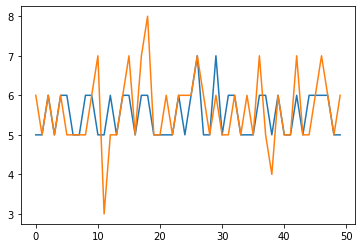

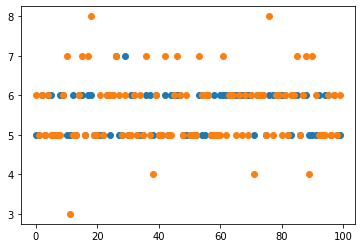

In [11]:
error = 0
predictions = [mlp_1.predict([x]) for x in X_test_1]
n = len(predictions)
for i in range(n):
  error+=(predictions[i]-y_true_1[i])**2

plt.plot(predictions[:50], label="predictions")
plt.plot(y_true_1[:50], label="true")
plt.show()
m = 100
plt.scatter(range(m), predictions[:m], label="predictions")
plt.scatter(range(m), y_true_1[:m], label="true")
plt.show()

In [12]:
rmse = (error/len(X_test_1))**(1/2)
rmse

array([0.79534631])

In [13]:
nrmse = rmse/5 #5 bo dane są od 3 do 8
nrmse

array([0.15906926])